In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn package's randomised data split function

import warnings
warnings.filterwarnings('ignore')

<h1>1. Load the Dataset</h1>

In [2]:
pd.set_option('display.max_columns', None)
p_data = pd.read_csv("Data - Parkinsons.csv")
p_data.head(5)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

<h1>2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,
Mention a few comments in this regard<h1>

Applying EDA to the dataset we can make the following inferences for the columns

In [3]:
p_data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [4]:
def calculate_97_percent_range(std_deviation, mean, maximum, minimum):
    data = {}
    data["lower_range"] = mean - 3*std_deviation
    data["higher_range"] = mean + 3*std_deviation
    data["max"] = maximum
    data["min"] = minimum
    return data

<b>MDVP:Fo(Hz)</b> The values range from a min of 88 to a maximum of 260, with mean as 154 and median as 148. As mean is greater than the median, we can infer that the distribution is skewed to the right also with a tail stretching towards the right.It's possible to find a few outliers as the 99.7% range is different than the min and max range of values 

In [5]:
# Calculating the 99.7 percent value and comparing them with the max and min to get an idea about the outliers
calculate_97_percent_range(p_data["MDVP:Fo(Hz)"].std(),p_data["MDVP:Fo(Hz)"].mean(),p_data["MDVP:Fo(Hz)"].max(),p_data["MDVP:Fo(Hz)"].min())


{'lower_range': 30.058446778426642,
 'higher_range': 278.3988352728555,
 'max': 260.105,
 'min': 88.333}

<AxesSubplot:xlabel='MDVP:Fo(Hz)', ylabel='Density'>

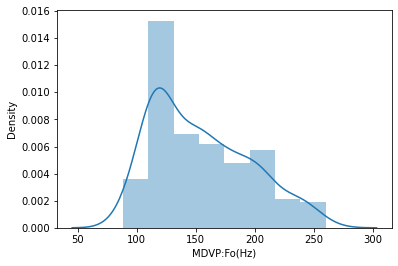

In [6]:
sns.distplot(p_data["MDVP:Fo(Hz)"])

<AxesSubplot:xlabel='MDVP:Fo(Hz)'>

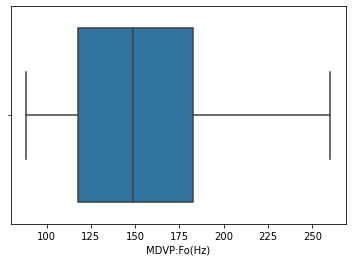

In [7]:
sns.boxplot(p_data["MDVP:Fo(Hz)"])

<b>MDVP:Fhi(Hz) </b>The mean(197.104918	) is far greater than the median(148.790000). The distribution should be skewed to the right and as seen below the 99.7 percent of values are hugely different in range than the min and max values so we can expect a number of outliers on the positive side

In [8]:
# Calculating the 99.7 percent value and comparing them with the max and min to get an idea about the outliers
calculate_97_percent_range(p_data["MDVP:Fhi(Hz)"].std(),p_data["MDVP:Fhi(Hz)"].mean(),p_data["MDVP:Fhi(Hz)"].max(),p_data["MDVP:Fhi(Hz)"].min())


{'lower_range': -77.36972495637306,
 'higher_range': 471.5795608538091,
 'max': 592.03,
 'min': 102.145}

<AxesSubplot:xlabel='MDVP:Fhi(Hz)'>

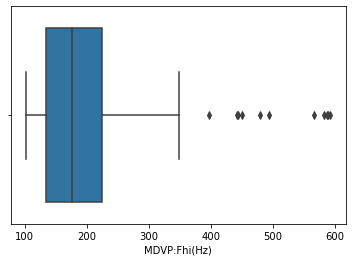

In [9]:
sns.boxplot(p_data["MDVP:Fhi(Hz)"])

<AxesSubplot:xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

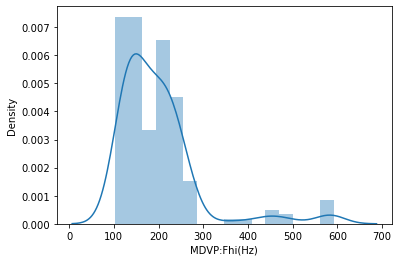

In [10]:
sns.distplot(p_data["MDVP:Fhi(Hz)"])

<b>MDVP:Flo(Hz) - Minimum vocal fundamental frequency	</b> For MDVP:Flo(Hz) the mean is 116.32463 and the median is 104.315000 which again shows a high positive skewness. From the below calculation we can see that the max and min values are very different than the 99.7 lower and higher ranges , which suggests a lot of outliers on the positive side.

In [11]:
calculate_97_percent_range(p_data["MDVP:Flo(Hz)"].std(),p_data["MDVP:Flo(Hz)"].mean(),p_data["MDVP:Flo(Hz)"].max(),p_data["MDVP:Flo(Hz)"].min())


{'lower_range': -14.239608776750174,
 'higher_range': 246.8888703152117,
 'max': 239.17,
 'min': 65.476}

<AxesSubplot:xlabel='MDVP:Flo(Hz)'>

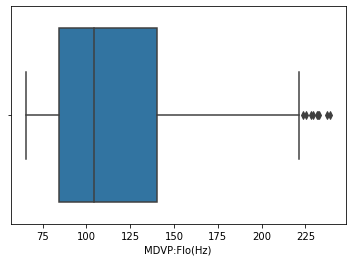

In [12]:
sns.boxplot(p_data["MDVP:Flo(Hz)"])

<b>MDVP:Jitter(%) - Measure of variation in fundamental frequency</b></br>
Mean and median are similar implying normal distribution.</br>
Again there is a lot of variation in the min max range of data and the 99.7 percent lower and higher ranges implying outliers on the right side as done in the calculations below.

In [13]:
calculate_97_percent_range(p_data["MDVP:Jitter(%)"].std(),p_data["MDVP:Jitter(%)"].mean(),p_data["MDVP:Jitter(%)"].max(),p_data["MDVP:Jitter(%)"].min())


{'lower_range': -0.008323939539346147,
 'higher_range': 0.020764862616269225,
 'max': 0.03316,
 'min': 0.00168}

<AxesSubplot:xlabel='MDVP:Jitter(%)'>

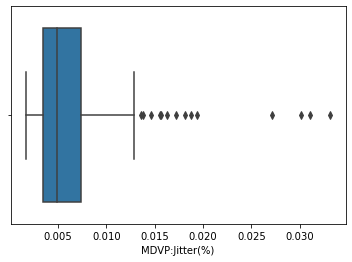

In [14]:
sns.boxplot(p_data["MDVP:Jitter(%)"])

<b>MDVP:Jitter(Abs)</b></br>
The mean and median values are close implying normal distribution.</br>
The min and max value ranges are very different than the 99.7 percent values which implies a lot of outliers on the right side.

In [15]:
calculate_97_percent_range(p_data["MDVP:Jitter(Abs)"].std(),p_data["MDVP:Jitter(Abs)"].mean(),p_data["MDVP:Jitter(Abs)"].max(),p_data["MDVP:Jitter(Abs)"].min())


{'lower_range': -6.050675144031543e-05,
 'higher_range': 0.00014842470015826418,
 'max': 0.00026000000000000003,
 'min': 7.000000000000001e-06}

<AxesSubplot:xlabel='MDVP:Jitter(Abs)'>

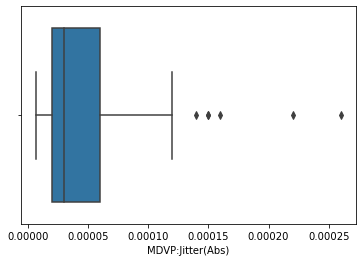

In [16]:
sns.boxplot(p_data["MDVP:Jitter(Abs)"])

<b>MDVP:RAP</b></br>
Comparing the mean and the median we can see that the values are right skewed.</br>
Also looking at the 99.7 percent data and the min max ranges we can see that there are a lot of outliers that can be expected.

In [17]:
calculate_97_percent_range(p_data["MDVP:RAP"].std(),p_data["MDVP:RAP"].mean(),p_data["MDVP:RAP"].max(),p_data["MDVP:RAP"].min())


{'lower_range': -0.005596912992194811,
 'higher_range': 0.012209733505015325,
 'max': 0.02144,
 'min': 0.0006799999999999999}

<AxesSubplot:xlabel='MDVP:RAP'>

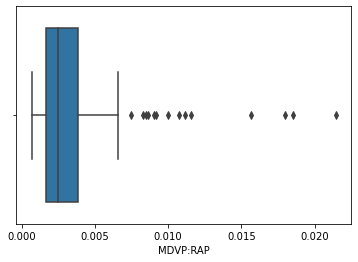

In [18]:
sns.boxplot(p_data["MDVP:RAP"])

<b>MDVP:PPQ	</b></br>
Mean and median differ and the min and max values are quite different than the 99.7% ranges.
We can infer that the data is positively skewed with a lot of outlier values.
    

In [19]:
calculate_97_percent_range(p_data["MDVP:PPQ"].std(),p_data["MDVP:PPQ"].mean(),p_data["MDVP:PPQ"].max(),p_data["MDVP:PPQ"].min())


{'lower_range': -0.0048305709665448174,
 'higher_range': 0.011723288915262765,
 'max': 0.01958,
 'min': 0.0009199999999999999}

<AxesSubplot:xlabel='MDVP:RAP'>

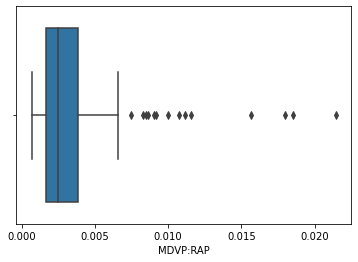

In [20]:
sns.boxplot(p_data["MDVP:RAP"])

<b>Jitter:DDP</b><br>
Comparing the mean and the median we can see that the values are right skewed. Also looking at the 99.7 percent data and the min max ranges we can see that there are a lot of outliers that can be expected. 

In [21]:
calculate_97_percent_range(p_data["Jitter:DDP"].std(),p_data["Jitter:DDP"].mean(),p_data["Jitter:DDP"].max(),p_data["Jitter:DDP"].min())


{'lower_range': -0.016790084349628247,
 'higher_range': 0.03662998178552567,
 'max': 0.06433,
 'min': 0.0020399999999999997}

<AxesSubplot:xlabel='Jitter:DDP'>

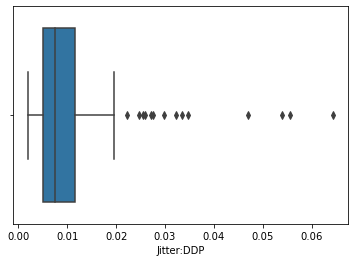

In [22]:
sns.boxplot(p_data["Jitter:DDP"])

<b>MDVP:Shimmer</b></br>
Not too much difference between mean and median.
The difference in values of min and max from the 99.7 lower and high ranges suggest a skew on the positive side.

In [23]:
calculate_97_percent_range(p_data["MDVP:Shimmer"].std(),p_data["MDVP:Shimmer"].mean(),p_data["MDVP:Shimmer"].max(),p_data["MDVP:Shimmer"].min())


{'lower_range': -0.026861667371712215,
 'higher_range': 0.08627992378196861,
 'max': 0.11907999999999999,
 'min': 0.00954}

<AxesSubplot:xlabel='MDVP:Shimmer'>

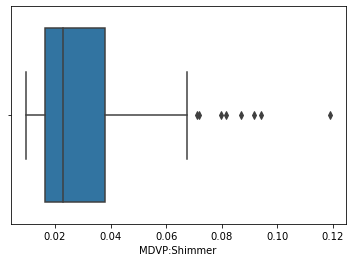

In [24]:
sns.boxplot(p_data["MDVP:Shimmer"])

<b>MDVP:Shimmer(dB)</b> mean and median are different implying positive skewness
The min max values and the 99.7 percentage ranges as given below show a lot of difference and implies a lot of outliers. The same is confirmed by the boxplot below.

In [25]:
print(calculate_97_percent_range(p_data["MDVP:Shimmer(dB)"].std(),p_data["MDVP:Shimmer(dB)"].mean(),p_data["MDVP:Shimmer(dB)"].max(),p_data["MDVP:Shimmer(dB)"].min()))
print("mean:", p_data["MDVP:Shimmer(dB)"].mean())
print("median:",  p_data["MDVP:Shimmer(dB)"].median())


{'lower_range': -0.30238058813032026, 'higher_range': 0.8668831522328844, 'max': 1.302, 'min': 0.085}
mean: 0.2822512820512821
median: 0.221


<AxesSubplot:xlabel='MDVP:Shimmer(dB)'>

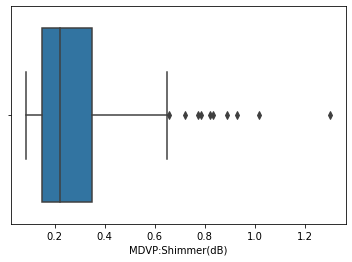

In [26]:
sns.boxplot(p_data["MDVP:Shimmer(dB)"])

<b>Shimmer:APQ3 - </b></br>
Not much difference between the mean and median but the 99.7 ranges and the min max values are quite different suggesting positive skewness.

In [27]:
print(calculate_97_percent_range(p_data["Shimmer:APQ3"].std(),p_data["Shimmer:APQ3"].mean(),p_data["Shimmer:APQ3"].max(),p_data["Shimmer:APQ3"].min()))
print("mean:", p_data["Shimmer:APQ3"].mean())
print("median:",  p_data["Shimmer:APQ3"].median())


{'lower_range': -0.014795330940973201, 'higher_range': 0.046123638633280895, 'max': 0.056470000000000006, 'min': 0.00455}
mean: 0.015664153846153845
median: 0.012790000000000001


sns.boxplot(p_data["Shimmer:APQ3"])

<b>Shimmer:APQ5</b></br>
Mean and median differ, and the min max values compared to the 99.7 percentage range shows an indication of positive skewness.

In [28]:
print(calculate_97_percent_range(p_data["Shimmer:APQ5"].std(),p_data["Shimmer:APQ5"].mean(),p_data["Shimmer:APQ5"].max(),p_data["Shimmer:APQ5"].min()))
print("mean:", p_data["Shimmer:APQ5"].mean())
print("median:",  p_data["Shimmer:APQ5"].median())


{'lower_range': -0.018192860205968775, 'higher_range': 0.05394937302648162, 'max': 0.0794, 'min': 0.0057}
mean: 0.01787825641025642
median: 0.01347


<AxesSubplot:xlabel='Shimmer:APQ5'>

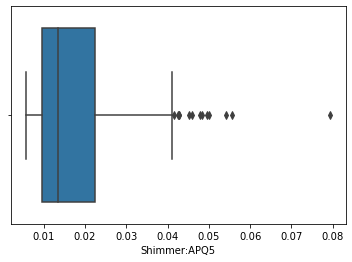

In [29]:
sns.boxplot(p_data["Shimmer:APQ5"])

<b>MDVP:APQ</b> Mean and median differ and a lot of difference in the min max value vis a vis the 99.7 percent value which suggests positive skewness. The same is confirmed by the boxplot below

In [30]:
print(calculate_97_percent_range(p_data["MDVP:APQ"].std(),p_data["MDVP:APQ"].mean(),p_data["MDVP:APQ"].max(),p_data["MDVP:APQ"].min()))
print("mean:", p_data["MDVP:APQ"].mean())
print("median:",  p_data["MDVP:APQ"].median())


{'lower_range': -0.026758721561601105, 'higher_range': 0.07492169592057546, 'max': 0.13777999999999999, 'min': 0.00719}
mean: 0.02408148717948718
median: 0.01826


<AxesSubplot:xlabel='MDVP:APQ'>

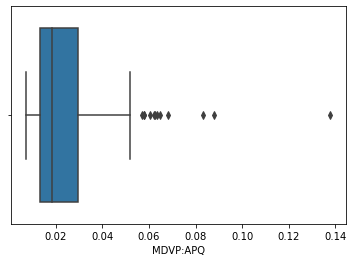

In [31]:
sns.boxplot(p_data["MDVP:APQ"])

<b>Shimmer:DDA</b></b> Difference in mean and median at this scale.
The min max values and the lower and higher 99.7 percent ranges show quite a bit of difference which suggests
positive skewness in data. Same is confirmed by the boxplot below

In [32]:
print(calculate_97_percent_range(p_data["Shimmer:DDA"].std(),p_data["Shimmer:DDA"].mean(),p_data["Shimmer:DDA"].max(),p_data["Shimmer:DDA"].min()))
print("mean:", p_data["Shimmer:DDA"].mean())
print("median:",  p_data["Shimmer:DDA"].median())


{'lower_range': -0.044384742909105865, 'higher_range': 0.1383699736783366, 'max': 0.16942000000000002, 'min': 0.013640000000000001}
mean: 0.04699261538461537
median: 0.038360000000000005


<AxesSubplot:xlabel='Shimmer:DDA'>

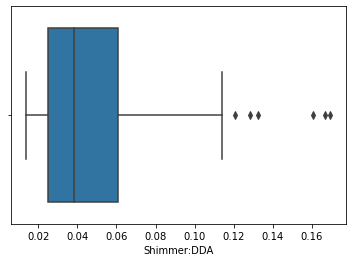

In [33]:
sns.boxplot(p_data["Shimmer:DDA"])

<b>NHR</b>Difference in mean and median at this scale. The min max values and the lower and higher 99.7 percent ranges show quite a bit of difference which suggests positive skewness in data. Same is confirmed by the boxplot below

In [34]:
print(calculate_97_percent_range(p_data["NHR"].std(),p_data["NHR"].mean(),p_data["NHR"].max(),p_data["NHR"].min()))
print("mean:", p_data["NHR"].mean())
print("median:",  p_data["NHR"].median())



{'lower_range': -0.09640826874513095, 'higher_range': 0.14610242259128478, 'max': 0.31482, 'min': 0.00065}
mean: 0.024847076923076923
median: 0.01166


<AxesSubplot:xlabel='NHR'>

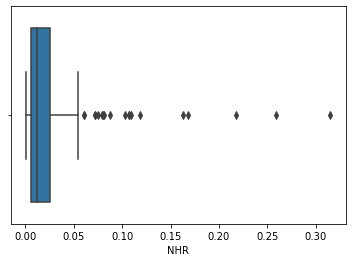

In [35]:
sns.boxplot(p_data["NHR"])

<b>HNR</b>

In [36]:
print(calculate_97_percent_range(p_data["HNR"].std(),p_data["HNR"].mean(),p_data["HNR"].max(),p_data["HNR"].min()))
print("mean:", p_data["HNR"].mean())
print("median:",  p_data["HNR"].median())


{'lower_range': 8.608681551784086, 'higher_range': 35.163267166164644, 'max': 33.047, 'min': 8.441}
mean: 21.885974358974366
median: 22.085


<AxesSubplot:xlabel='HNR'>

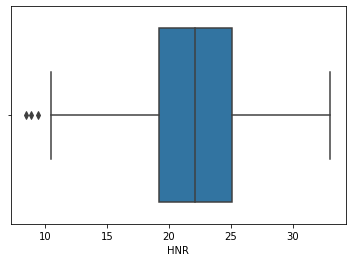

In [37]:
sns.boxplot(p_data["HNR"])

<b>RPDE</b></br> The mean and median are almost same.Very few outliers on the left side.

In [38]:
print(calculate_97_percent_range(p_data["RPDE"].std(),p_data["RPDE"].mean(),p_data["RPDE"].max(),p_data["RPDE"].min()))
print("mean:", p_data["RPDE"].mean())
print("median:",  p_data["RPDE"].median())


{'lower_range': 0.1867103960693346, 'higher_range': 0.8103606808537426, 'max': 0.6851510000000001, 'min': 0.25656999999999996}
mean: 0.4985355384615386
median: 0.495954


<AxesSubplot:xlabel='RPDE'>

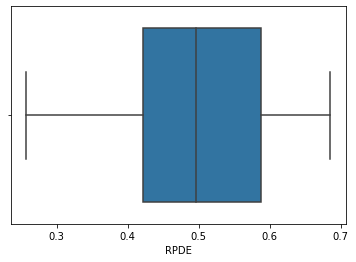

In [39]:
sns.boxplot(p_data["RPDE"])

<b>DFA</b>

In [40]:
calculate_97_percent_range(p_data["DFA"].std(),p_data["DFA"].mean(),p_data["DFA"].max(),p_data["DFA"].min())


{'lower_range': 0.552091555114056,
 'higher_range': 0.8841065371936369,
 'max': 0.8252879999999999,
 'min': 0.574282}

<AxesSubplot:xlabel='DFA'>

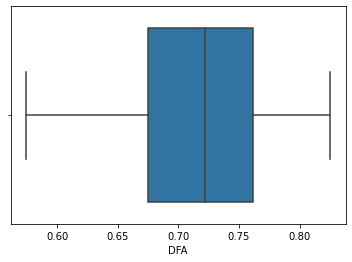

In [41]:
sns.boxplot(p_data["DFA"])

<b>spread1</b>

In [42]:
calculate_97_percent_range(p_data["spread1"].std(),p_data["spread1"].mean(),p_data["spread1"].max(),p_data["spread1"].min())


{'lower_range': -8.95502003481067,
 'higher_range': -2.413773452368816,
 'max': -2.434031,
 'min': -7.964983999999999}

<AxesSubplot:xlabel='spread1'>

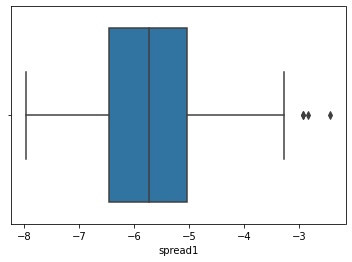

In [43]:
sns.boxplot(p_data["spread1"])

<b>spread2</b>

In [44]:
calculate_97_percent_range(p_data["spread2"].std(),p_data["spread2"].mean(),p_data["spread2"].max(),p_data["spread2"].min())


{'lower_range': -0.02370693914324465,
 'higher_range': 0.47672763657914186,
 'max': 0.45049300000000003,
 'min': 0.006274}

<AxesSubplot:xlabel='spread2'>

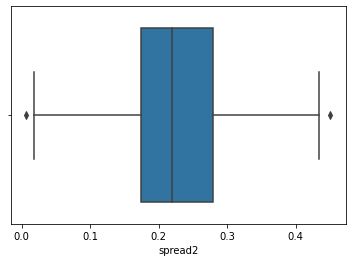

In [45]:
sns.boxplot(p_data["spread2"])

<b>D2</b>

In [46]:
calculate_97_percent_range(p_data["D2"].std(),p_data["D2"].mean(),p_data["D2"].max(),p_data["D2"].min())


{'lower_range': 1.2334289475411375,
 'higher_range': 3.5302232268178373,
 'max': 3.671155,
 'min': 1.4232870000000002}

<AxesSubplot:xlabel='D2'>

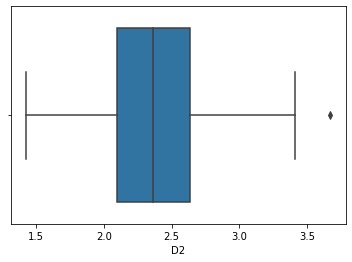

In [47]:
sns.boxplot(p_data["D2"])

<b>PPE</b>

In [48]:
calculate_97_percent_range(p_data["PPE"].std(),p_data["PPE"].mean(),p_data["PPE"].max(),p_data["PPE"].min())


{'lower_range': -0.0638063264211842,
 'higher_range': 0.47690960847246633,
 'max': 0.527367,
 'min': 0.044538999999999995}

<AxesSubplot:xlabel='PPE'>

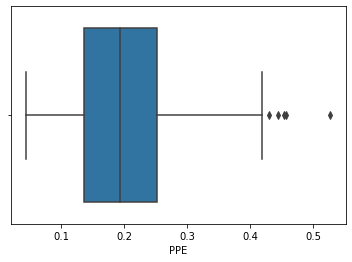

In [49]:
sns.boxplot(p_data["PPE"])

In [50]:
p_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [51]:
p_data.shape

(195, 24)

In [52]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Most of the data is of float type(conituous) with name as an object type and status as the categorical variable and is label encoded. </br>
The status is the value that we need to predict and is the <b>dependent variable.</b> It takes two values 0 and 1 which signify healthy and parkinson afflicted people respectively.</br>
The name attribute adds no value to the machine learning analysis and can be <b>deleted</b> from the dataset.

In [53]:
p_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [54]:
p_data.isnull().values.any()

False

<b>No Null data found</b>

<b>Checking for skewness in data</b>

In [55]:
def check_skewness():
    for column in p_data.columns:
         if((column != 'name') and (column != 'status')):
                print(column,"skewness is",p_data[column].skew())

In [56]:
check_skewness()

MDVP:Fo(Hz) skewness is 0.5917374636540784
MDVP:Fhi(Hz) skewness is 2.542145997588398
MDVP:Flo(Hz) skewness is 1.217350448627808
MDVP:Jitter(%) skewness is 3.0849462014441817
MDVP:Jitter(Abs) skewness is 2.6490714165257274
MDVP:RAP skewness is 3.360708450480554
MDVP:PPQ skewness is 3.073892457888517
Jitter:DDP skewness is 3.3620584478857203
MDVP:Shimmer skewness is 1.6664804101559663
MDVP:Shimmer(dB) skewness is 1.999388639086127
Shimmer:APQ3 skewness is 1.5805763798815677
Shimmer:APQ5 skewness is 1.798697066537622
MDVP:APQ skewness is 2.618046502215422
Shimmer:DDA skewness is 1.5806179936782263
NHR skewness is 4.22070912913906
HNR skewness is -0.5143174975652068
RPDE skewness is -0.14340241379821705
DFA skewness is -0.03321366071383484
spread1 skewness is 0.4321389320131796
spread2 skewness is 0.14443048549278412
D2 skewness is 0.4303838913329283
PPE skewness is 0.7974910716463578


The data as shown in the individual column analysis and the skew function for the dataset <b>shows skewness</b> in almost all the columns

<b>Relationship of Status with other column averages</b>

In [57]:
p_data.groupby(p_data['status']).mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
status                                                                        
0               0.162958      0.009504      0.010509  0.013305     0.028511   
1               0.321204      0.017676      0.020285  0.027600     0.053027   

             NHR        HNR      RPDE       DFA   spread1   spread2        D2  \
status                                                                          
0       0.011483  24.678750  0.442552  0.695716 -6.759264  0.160292  2.154491   
1       0.029211  20.974048  0.516816  0.725408 -5.333420  0.248133  2.456058   

             PPE  
status            
0       0.123017  
1       0.233828

The status 0 implies a person who is healthy and status 1 is the person who is healthy.<br>
A comparitive study of all the columns are given above for healthy and parkinson inflicted person.

<b>Checking outliers for each column</b>

In [58]:
def check_outliers():
    for column in p_data.columns:
         if((column != 'name') and (column != 'status')):
            first_quartile = np.percentile(p_data[column], 25)
            third_quartile = np.percentile(p_data[column], 75)
            iqr = third_quartile - first_quartile
            low_lim = first_quartile - 1.5 * iqr 
            up_lim =  third_quartile + 1.5 * iqr
            outlier =[] 
            for x in p_data[column]: 
                if ((x> up_lim) or (x<low_lim)): 
                     outlier.append(x) 
            print(' no. of outliers are', len(outlier),'for the column ', column)


In [59]:
check_outliers()

 no. of outliers are 0 for the column  MDVP:Fo(Hz)
 no. of outliers are 11 for the column  MDVP:Fhi(Hz)
 no. of outliers are 9 for the column  MDVP:Flo(Hz)
 no. of outliers are 14 for the column  MDVP:Jitter(%)
 no. of outliers are 6 for the column  MDVP:Jitter(Abs)
 no. of outliers are 14 for the column  MDVP:RAP
 no. of outliers are 15 for the column  MDVP:PPQ
 no. of outliers are 14 for the column  Jitter:DDP
 no. of outliers are 8 for the column  MDVP:Shimmer
 no. of outliers are 10 for the column  MDVP:Shimmer(dB)
 no. of outliers are 6 for the column  Shimmer:APQ3
 no. of outliers are 13 for the column  Shimmer:APQ5
 no. of outliers are 12 for the column  MDVP:APQ
 no. of outliers are 6 for the column  Shimmer:DDA
 no. of outliers are 19 for the column  NHR
 no. of outliers are 3 for the column  HNR
 no. of outliers are 0 for the column  RPDE
 no. of outliers are 0 for the column  DFA
 no. of outliers are 4 for the column  spread1
 no. of outliers are 2 for the column  spread2
 n

Most columns have outliers , the number of outliers along with the column are printed above.
This is one of the <b>challenge</b> that we will have to address as we work through the dataset

In [60]:
p_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

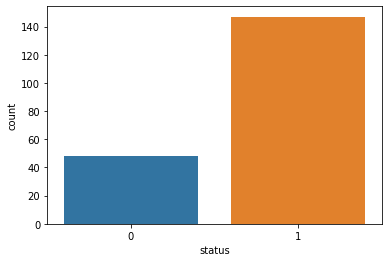

In [61]:
sns.countplot(x='status',data=p_data)
plt.show()

The ratio of people who are parkinson challenged are very <b>high</b> than the people who don't. Ideally a homogenous dataset is well suited for machine learning analysis. We might have to balance the classes.

Overall the key challenges are</br>
1. skewness in data </br>
2. bias in data </br>
3. outlier values</br>

<h1>3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships<h1>

In [62]:
p_data.drop(['name'], axis=1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0               0.426       0.02182       0.03130   0.02971      0.06545   
1               0.626       0.03134       0.04518   0.04368      0.09403   
2               0.482       0.02757       0.03858   0.03590      0.08270   
3               0.517       0.02924       0.04005   0.03772      0.08771   
4               0.584       0.03490       0.04825   0.04465      0.10470   
..                ...           ...           ...       ...          ...   
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

         NHR     HNR  status      RPDE       DFA   spread1   spread2  \
0    0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482   
1    0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590   
2    0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173   
3    0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147   
4    0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513   
..       ...     ...     ...       ...       ...       ...       ...   
190  0.02764  19.517       0  0.448439  0.657899 -6.538586  0.121952   
191  0.01810  19.147       0  0.431674  0.683244 -6.195325  0.129303   
192  0.10715  17.883       0  0.407567  0.655683 -6.787197  0.158453   
193  0.07223  19.020       0  0.451221  0.643956 -6.744577  0.207454   
194  0.04398  21.209       0  0.462803  0.664357 -5.724056  0.190667   

           D2       PPE  
0    2.301442  0.284654  
1    2.486855  0.368674  
2    2.342259  0.332634  
3    2.405554  0.368975  
4    2.332180  0.410335  
..        ...       ...  
190  2.657476  0.133050  
191  2.784312  0.168895  
192  2.679772  0.131728  
193  2.138608  0.123306  
194  2.555477  0.148569  

[195 rows x 23 columns]

<b>Box plot of all the features grouped by status to understand the distributions, spreads and tails</b> 

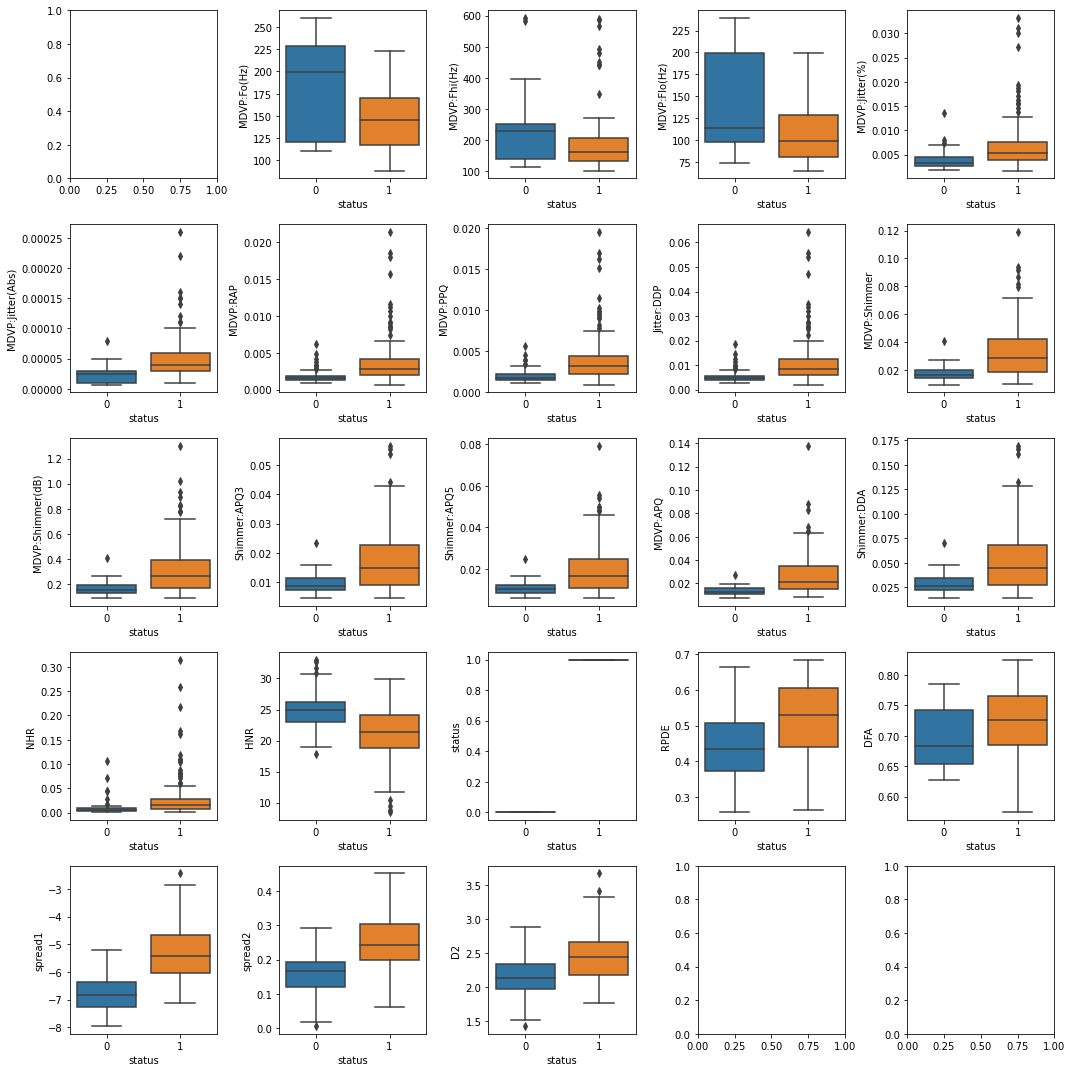

In [63]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(p_data.columns)-1):
    sns.boxplot(x='status',y=p_data.iloc[:,i],data=p_data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

We had plotted the individual boxplots in Section 2 and did analysis on the skewness and outliers present in data.<br> Grouping the box plots by status gives a visual comparison of this spread across the status. <br>
As we can see for the features given above, the medians are quite different for each of the statuses of the feature<br> and there is a considerable difference in the range of the values and the spread <br>of the outliers for the same feature with different status.This indicates the difference in each of the parameter values<br> for a parkinson inflicted person and a healthy person. We will carry out more elaborate breakup in the following sections.

<b>Skewness</b>

In [64]:
check_skewness()

MDVP:Fo(Hz) skewness is 0.5917374636540784
MDVP:Fhi(Hz) skewness is 2.542145997588398
MDVP:Flo(Hz) skewness is 1.217350448627808
MDVP:Jitter(%) skewness is 3.0849462014441817
MDVP:Jitter(Abs) skewness is 2.6490714165257274
MDVP:RAP skewness is 3.360708450480554
MDVP:PPQ skewness is 3.073892457888517
Jitter:DDP skewness is 3.3620584478857203
MDVP:Shimmer skewness is 1.6664804101559663
MDVP:Shimmer(dB) skewness is 1.999388639086127
Shimmer:APQ3 skewness is 1.5805763798815677
Shimmer:APQ5 skewness is 1.798697066537622
MDVP:APQ skewness is 2.618046502215422
Shimmer:DDA skewness is 1.5806179936782263
NHR skewness is 4.22070912913906
HNR skewness is -0.5143174975652068
RPDE skewness is -0.14340241379821705
DFA skewness is -0.03321366071383484
spread1 skewness is 0.4321389320131796
spread2 skewness is 0.14443048549278412
D2 skewness is 0.4303838913329283
PPE skewness is 0.7974910716463578


<b>outliers</b>

In [65]:
check_outliers()

 no. of outliers are 0 for the column  MDVP:Fo(Hz)
 no. of outliers are 11 for the column  MDVP:Fhi(Hz)
 no. of outliers are 9 for the column  MDVP:Flo(Hz)
 no. of outliers are 14 for the column  MDVP:Jitter(%)
 no. of outliers are 6 for the column  MDVP:Jitter(Abs)
 no. of outliers are 14 for the column  MDVP:RAP
 no. of outliers are 15 for the column  MDVP:PPQ
 no. of outliers are 14 for the column  Jitter:DDP
 no. of outliers are 8 for the column  MDVP:Shimmer
 no. of outliers are 10 for the column  MDVP:Shimmer(dB)
 no. of outliers are 6 for the column  Shimmer:APQ3
 no. of outliers are 13 for the column  Shimmer:APQ5
 no. of outliers are 12 for the column  MDVP:APQ
 no. of outliers are 6 for the column  Shimmer:DDA
 no. of outliers are 19 for the column  NHR
 no. of outliers are 3 for the column  HNR
 no. of outliers are 0 for the column  RPDE
 no. of outliers are 0 for the column  DFA
 no. of outliers are 4 for the column  spread1
 no. of outliers are 2 for the column  spread2
 n

<b>MDVP:Fo(Hz)</b>

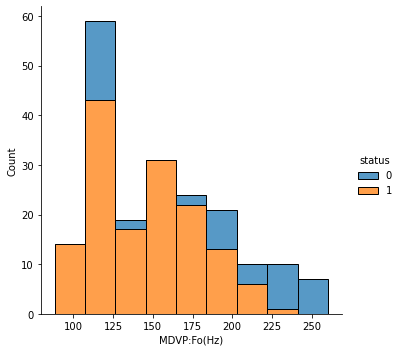

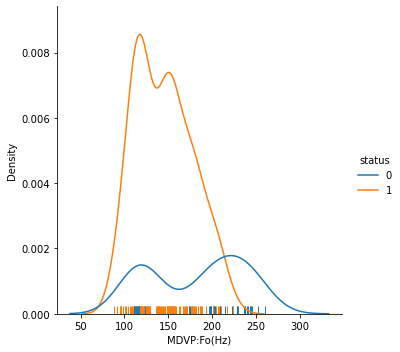

{'lower_range': 30.058446778426642, 'higher_range': 278.3988352728555, 'max': 260.105, 'min': 88.333}
mean: 154.22864102564105
median: 148.79


In [66]:
sns.displot(data=p_data,x=p_data["MDVP:Fo(Hz)"], hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=p_data, x=p_data["MDVP:Fo(Hz)"], hue="status", kind="kde",rug=True)
plt.show()
print(calculate_97_percent_range(p_data["MDVP:Fo(Hz)"].std(),p_data["MDVP:Fo(Hz)"].mean(),p_data["MDVP:Fo(Hz)"].max(),p_data["MDVP:Fo(Hz)"].min()))
print("mean:", p_data["MDVP:Fo(Hz)"].mean())
print("median:",  p_data["MDVP:Fo(Hz)"].median())


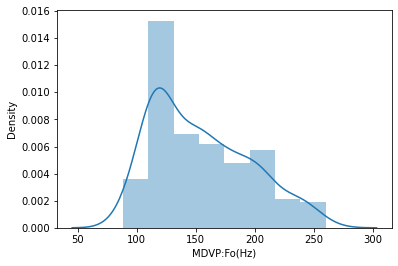

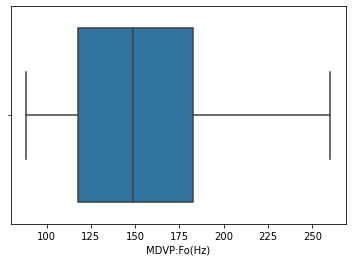

In [67]:
sns.distplot(p_data['MDVP:Fo(Hz)'])
plt.show()
sns.boxplot(p_data["MDVP:Fo(Hz)"])
plt.show()

 As can be seen from the box plots of section 2 and the graphs there is a bit of positive skewness in data. The skewness values of all the columns are populated in the skewness section.</br> There are no outliers as can be seen from the box plot and the outlier calculation in this section.</br>
The distribution values for PD and healthy people comparison is shown in the kde graphs.


<b>MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%)</b>

<AxesSubplot:xlabel='MDVP:Jitter(%)', ylabel='Density'>

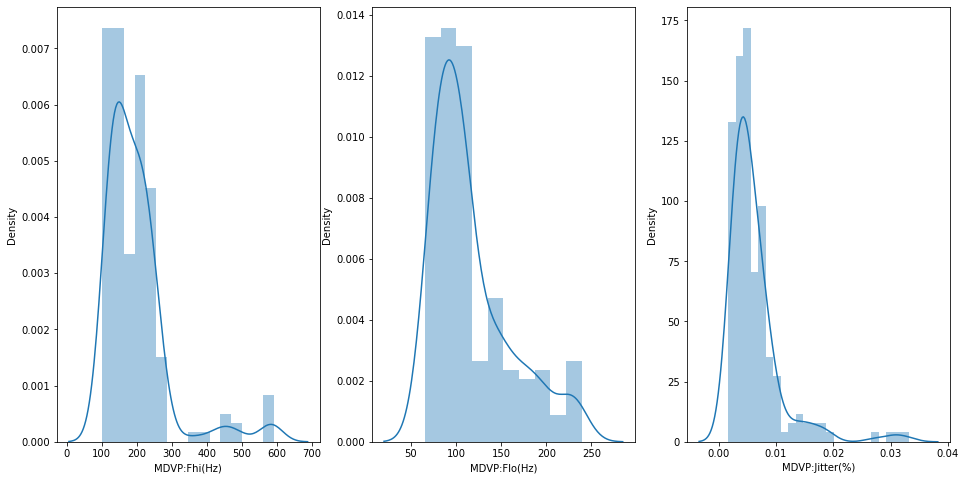

In [68]:
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.distplot(p_data['MDVP:Fhi(Hz)'],ax=ax[0])
sns.distplot(p_data['MDVP:Flo(Hz)'],ax=ax[1])
sns.distplot(p_data['MDVP:Jitter(%)'],ax=ax[2])


{'lower_range': -77.36972495637306, 'higher_range': 471.5795608538091, 'max': 592.03, 'min': 102.145}
mean: 197.104917948718
median: 175.829


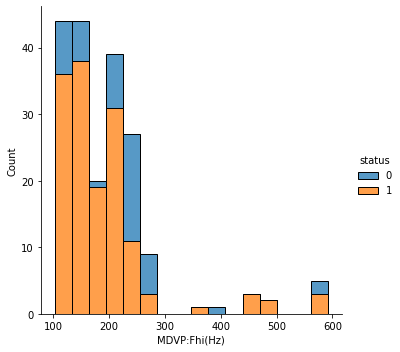

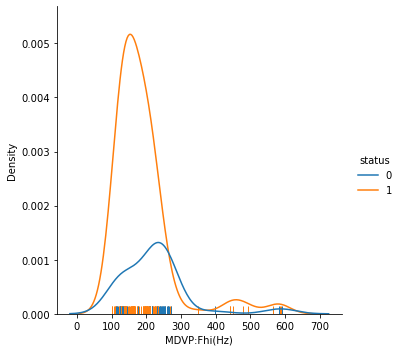

In [69]:
sns.displot(data=p_data,x=p_data["MDVP:Fhi(Hz)"],ax=ax[0], hue="status", kind="hist",multiple="stack")
sns.displot(data=p_data, x=p_data["MDVP:Fhi(Hz)"], ax=ax[1], hue="status", kind="kde",rug=True)
print(calculate_97_percent_range(p_data["MDVP:Fhi(Hz)"].std(),p_data["MDVP:Fhi(Hz)"].mean(),p_data["MDVP:Fhi(Hz)"].max(),p_data["MDVP:Fhi(Hz)"].min()))
print("mean:", p_data["MDVP:Fhi(Hz)"].mean())
print("median:",  p_data["MDVP:Fhi(Hz)"].median())


{'lower_range': -14.239608776750174, 'higher_range': 246.8888703152117, 'max': 239.17, 'min': 65.476}
mean: 116.32463076923077
median: 104.315


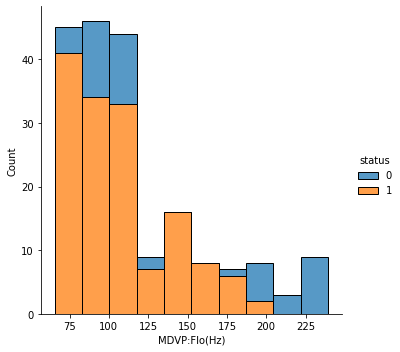

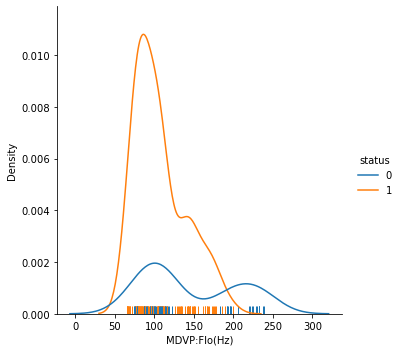

In [70]:
sns.displot(data=p_data,x=p_data["MDVP:Flo(Hz)"],ax=ax[0], hue="status", kind="hist",multiple="stack")
sns.displot(data=p_data, x=p_data["MDVP:Flo(Hz)"], ax=ax[1], hue="status", kind="kde",rug=True)
print(calculate_97_percent_range(p_data["MDVP:Flo(Hz)"].std(),p_data["MDVP:Flo(Hz)"].mean(),p_data["MDVP:Flo(Hz)"].max(),p_data["MDVP:Flo(Hz)"].min()))
print("mean:", p_data["MDVP:Flo(Hz)"].mean())
print("median:",  p_data["MDVP:Flo(Hz)"].median())


{'lower_range': -0.008323939539346147, 'higher_range': 0.020764862616269225, 'max': 0.03316, 'min': 0.00168}
mean: 0.006220461538461539
median: 0.00494


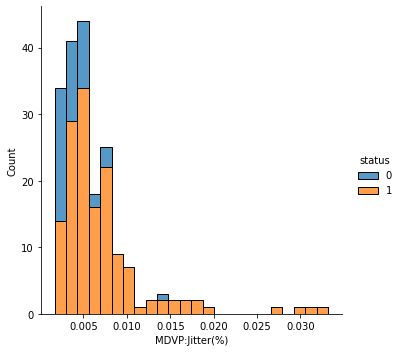

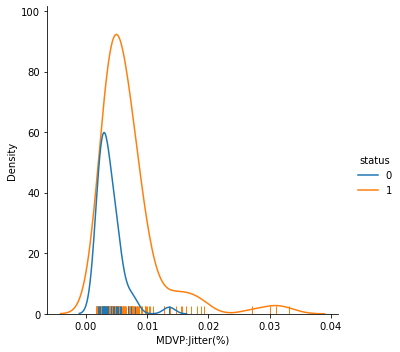

In [71]:
sns.displot(data=p_data,x=p_data["MDVP:Jitter(%)"],ax=ax[0], hue="status", kind="hist",multiple="stack")
sns.displot(data=p_data, x=p_data["MDVP:Jitter(%)"], ax=ax[1], hue="status", kind="kde",rug=True)
print(calculate_97_percent_range(p_data["MDVP:Jitter(%)"].std(),p_data["MDVP:Jitter(%)"].mean(),p_data["MDVP:Jitter(%)"].max(),p_data["MDVP:Jitter(%)"].min()))
print("mean:", p_data["MDVP:Jitter(%)"].mean())
print("median:",  p_data["MDVP:Jitter(%)"].median())


<b>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA</b>

MDVP:Shimmer stats  {'lower_range': -0.026861667371712215, 'higher_range': 0.08627992378196861, 'max': 0.11907999999999999, 'min': 0.00954}
MDVP:Shimmer(dB) stats {'lower_range': -0.30238058813032026, 'higher_range': 0.8668831522328844, 'max': 1.302, 'min': 0.085}
Shimmer:APQ3 stats {'lower_range': -0.014795330940973201, 'higher_range': 0.046123638633280895, 'max': 0.056470000000000006, 'min': 0.00455}
MDVP:Shimmer:APQ5 stats {'lower_range': -0.018192860205968775, 'higher_range': 0.05394937302648162, 'max': 0.0794, 'min': 0.0057}
MDVP:MDVP:APQ stats {'lower_range': -0.026758721561601105, 'higher_range': 0.07492169592057546, 'max': 0.13777999999999999, 'min': 0.00719}
MDVP:Shimmer:DDA stats {'lower_range': -0.044384742909105865, 'higher_range': 0.1383699736783366, 'max': 0.16942000000000002, 'min': 0.013640000000000001}


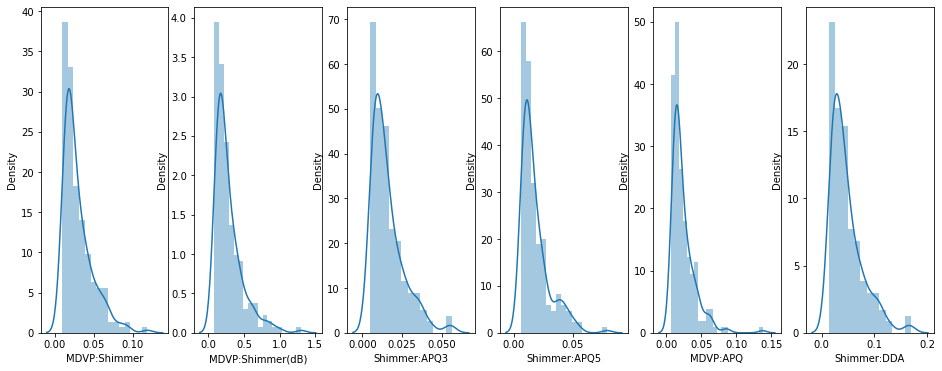

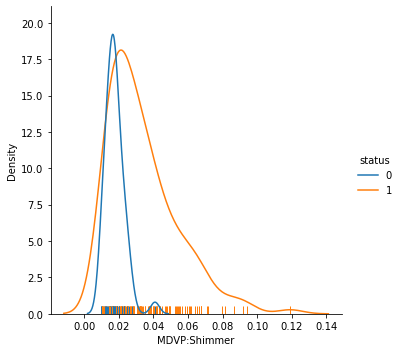

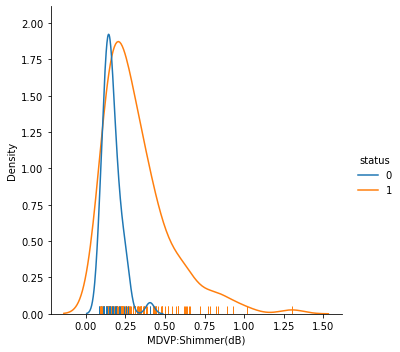

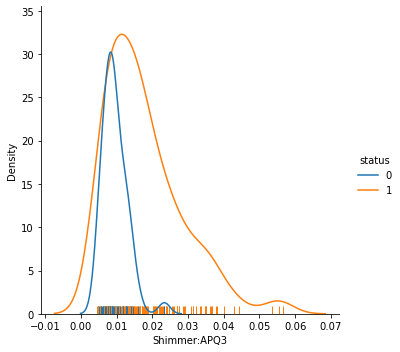

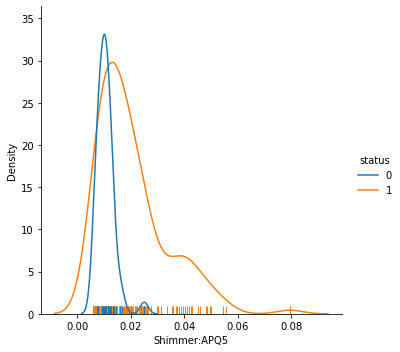

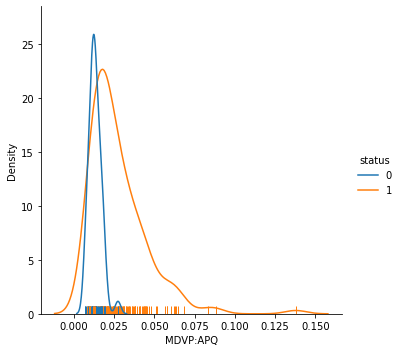

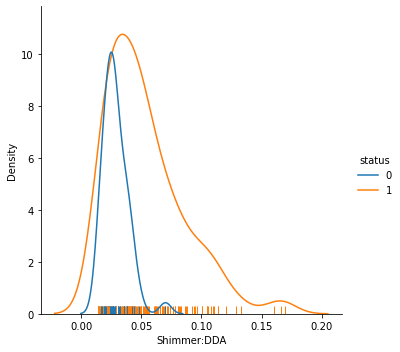

In [72]:
fig, ax = plt.subplots(1,6,figsize=(16,6))
sns.distplot(p_data['MDVP:Shimmer'],ax=ax[0])
sns.distplot(p_data['MDVP:Shimmer(dB)'],ax=ax[1])
sns.distplot(p_data['Shimmer:APQ3'],ax=ax[2])
sns.distplot(p_data['Shimmer:APQ5'],ax=ax[3])
sns.distplot(p_data['MDVP:APQ'],ax=ax[4])
sns.distplot(p_data['Shimmer:DDA'],ax=ax[5])
sns.displot(data=p_data, x=p_data["MDVP:Shimmer"], ax=ax[1], hue="status", kind="kde",rug=True)
print("MDVP:Shimmer stats ",calculate_97_percent_range(p_data["MDVP:Shimmer"].std(),p_data["MDVP:Shimmer"].mean(),p_data["MDVP:Shimmer"].max(),p_data["MDVP:Shimmer"].min()))
sns.displot(data=p_data, x=p_data["MDVP:Shimmer(dB)"], ax=ax[1], hue="status", kind="kde",rug=True)
print("MDVP:Shimmer(dB) stats",calculate_97_percent_range(p_data["MDVP:Shimmer(dB)"].std(),p_data["MDVP:Shimmer(dB)"].mean(),p_data["MDVP:Shimmer(dB)"].max(),p_data["MDVP:Shimmer(dB)"].min()))
sns.displot(data=p_data, x=p_data["Shimmer:APQ3"], ax=ax[1], hue="status", kind="kde",rug=True)
print("Shimmer:APQ3 stats",calculate_97_percent_range(p_data["Shimmer:APQ3"].std(),p_data["Shimmer:APQ3"].mean(),p_data["Shimmer:APQ3"].max(),p_data["Shimmer:APQ3"].min()))
sns.displot(data=p_data, x=p_data["Shimmer:APQ5"], ax=ax[1], hue="status", kind="kde",rug=True)
print("MDVP:Shimmer:APQ5 stats",calculate_97_percent_range(p_data["Shimmer:APQ5"].std(),p_data["Shimmer:APQ5"].mean(),p_data["Shimmer:APQ5"].max(),p_data["Shimmer:APQ5"].min()))
sns.displot(data=p_data, x=p_data["MDVP:APQ"], ax=ax[1], hue="status", kind="kde",rug=True)
print("MDVP:MDVP:APQ stats",calculate_97_percent_range(p_data["MDVP:APQ"].std(),p_data["MDVP:APQ"].mean(),p_data["MDVP:APQ"].max(),p_data["MDVP:APQ"].min()))
sns.displot(data=p_data, x=p_data["Shimmer:DDA"], ax=ax[1], hue="status", kind="kde",rug=True)
print("MDVP:Shimmer:DDA stats",calculate_97_percent_range(p_data["Shimmer:DDA"].std(),p_data["Shimmer:DDA"].mean(),p_data["Shimmer:DDA"].max(),p_data["Shimmer:DDA"].min()))


The box plot distribution for the above features are explained in section 2.<br>
The above graph depict a comparitive study of features with respect to status, that is the distribution of people with PD vs non Parkinson. <br>
The outlier values are given below and has been presented for all the features in the <br>beginning of the section<br>
The mean and median values along with 99.7 percent range comparison with min and max values are printed above the graph to get an idea of the distribution and skewness.<br>
The exact values are as following<br>
The <b>outlier numbers</b> are given below<br>
 no. of outliers are 8 for the column  MDVP:Shimmer<br>
 no. of outliers are 10 for the column  MDVP:Shimmer(dB)<br>
 no. of outliers are 6 for the column  Shimmer:APQ3<br>
 no. of outliers are 13 for the column  Shimmer:APQ5<br>
 no. of outliers are 12 for the column  MDVP:APQ<br>
 no. of outliers are 6 for the column  Shimmer:DDA<br>
 The <b>skewness</b> value of the fields are <br>
 MDVP:Shimmer skewness is 1.6664804101559663<br>
MDVP:Shimmer(dB) skewness is 1.999388639086127<br>
Shimmer:APQ3 skewness is 1.5805763798815677<br>
Shimmer:APQ5 skewness is 1.798697066537622<br>
MDVP:APQ skewness is 2.618046502215422<br>
Shimmer:DDA skewness is 1.5806179936782263<br>


<b>NHR,HNR</b>

NHR stats  {'lower_range': -0.09640826874513095, 'higher_range': 0.14610242259128478, 'max': 0.31482, 'min': 0.00065}
HNR stats {'lower_range': 8.608681551784086, 'higher_range': 35.163267166164644, 'max': 33.047, 'min': 8.441}


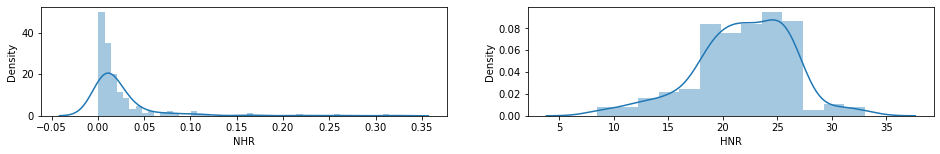

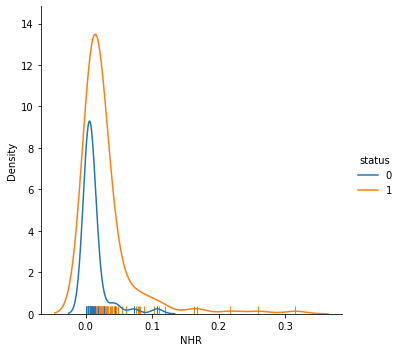

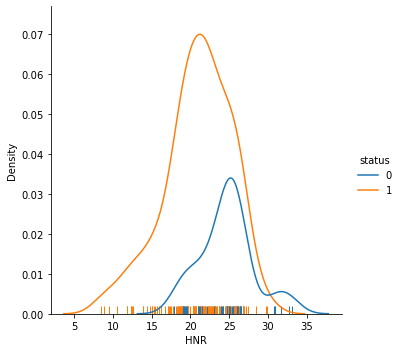

In [73]:
fig, ax = plt.subplots(1,2,figsize=(16,2))
sns.distplot(p_data['NHR'],ax=ax[0])
sns.distplot(p_data['HNR'],ax=ax[1])

sns.displot(data=p_data, x=p_data["NHR"], ax=ax[0], hue="status", kind="kde",rug=True)
print("NHR stats ",calculate_97_percent_range(p_data["NHR"].std(),p_data["NHR"].mean(),p_data["NHR"].max(),p_data["NHR"].min()))
sns.displot(data=p_data, x=p_data["HNR"], ax=ax[1], hue="status", kind="kde",rug=True)
print("HNR stats",calculate_97_percent_range(p_data["HNR"].std(),p_data["HNR"].mean(),p_data["HNR"].max(),p_data["HNR"].min()))


Below are the values for outliers and skewness<br>
no. of outliers are 19 for the column  NHR<br>
no. of outliers are 3 for the column  HNR<br>
NHR skewness is 4.22070912913906<br>
HNR skewness is -0.5143174975652068<br>
The boxplot has been plotted in section 1<br>
HNR shows a bit of negative skewness and is also confirmed by the skewness value above.
NHR is positively skewed.
The maximum number of observations is between 0 and 0.04.
The distribution of these features in terms of status is also plotted above and indicates a sharp rise in distribtion at 25 for non PD vs 20 for PD. 

<b>RPDE,D2</b>

RPDE stats  {'lower_range': -0.2869780654691271, 'higher_range': 0.3366722193152809, 'max': 0.6851510000000001, 'min': 0.25656999999999996}
D2 stats {'lower_range': 1.2334289475411375, 'higher_range': 3.5302232268178373, 'max': 3.671155, 'min': 1.4232870000000002}


<AxesSubplot:xlabel='status', ylabel='D2'>

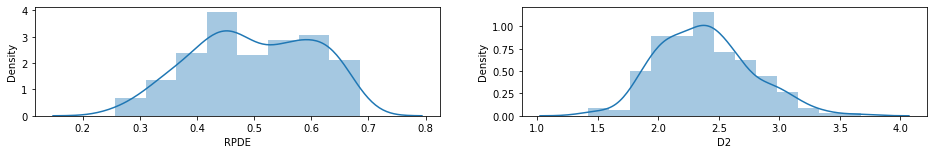

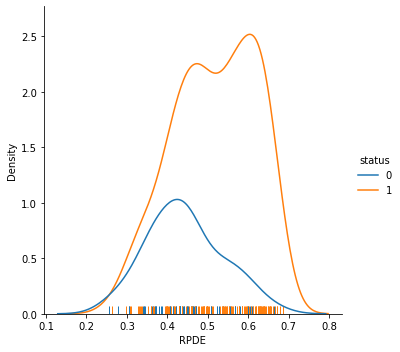

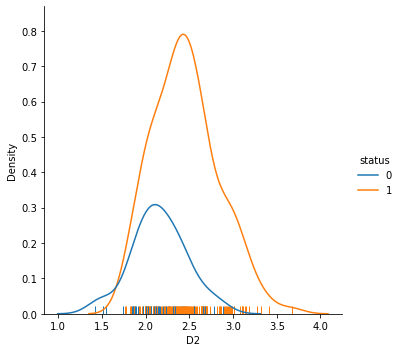

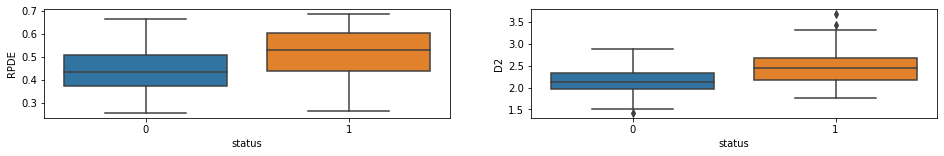

In [74]:
fig, ax = plt.subplots(1,2,figsize=(16,2))
sns.distplot(p_data['RPDE'],ax=ax[0])
sns.distplot(p_data['D2'],ax=ax[1])

sns.displot(data=p_data, x=p_data["RPDE"], ax=ax[0], hue="status", kind="kde",rug=True)
print("RPDE stats ",calculate_97_percent_range(p_data["RPDE"].std(),p_data["NHR"].mean(),p_data["RPDE"].max(),p_data["RPDE"].min()))

sns.displot(data=p_data, x=p_data["D2"], ax=ax[1], hue="status", kind="kde",rug=True)
print("D2 stats",calculate_97_percent_range(p_data["D2"].std(),p_data["D2"].mean(),p_data["D2"].max(),p_data["D2"].min()))
fig, ax = plt.subplots(1,2,figsize=(16,2))
sns.boxplot(x='status',y=p_data["RPDE"],data=p_data, ax=ax[0])
sns.boxplot(x='status',y=p_data["D2"],data=p_data, ax=ax[1])


Skewness and outlier values<br>
RPDE skewness is -0.14340241379821705<br>
D2 skewness is 0.4303838913329283<br>
no. of outliers are 0 for the column  RPDE<br>
no. of outliers are 1 for the column  D2<br>
For <b>RPDE</b>  there are no ouliers, KDE rug shows no clear separation between PD and non PD.<br>
For <b>D2</b> There is one outlier in a complete box plot without segmentation and 2 if we segment it into PD and non PD.
The values are very intermixed for the two status classes. The measure of skewness is indicated above with the relevant sign


<b>spread1,spread2,PPE</b>

spread1 stats  {'lower_range': -8.95502003481067, 'higher_range': -2.413773452368816, 'max': -2.434031, 'min': -7.964983999999999}
spread2 stats {'lower_range': -0.02370693914324465, 'higher_range': 0.47672763657914186, 'max': 0.45049300000000003, 'min': 0.006274}
PPE stats {'lower_range': -0.0638063264211842, 'higher_range': 0.47690960847246633, 'max': 0.527367, 'min': 0.044538999999999995}


<AxesSubplot:xlabel='status', ylabel='PPE'>

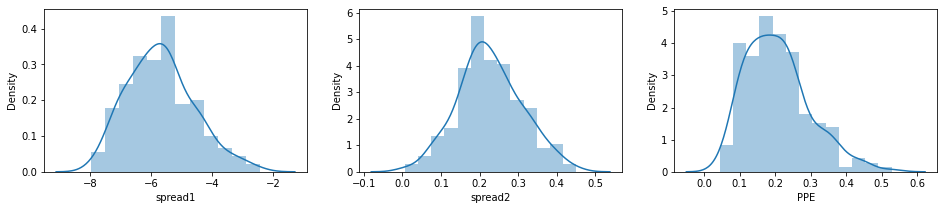

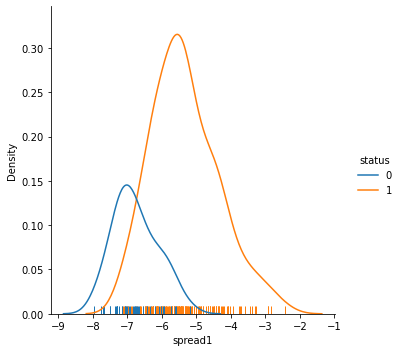

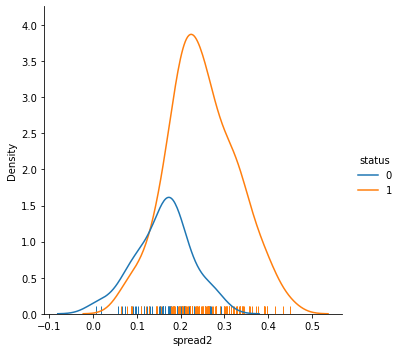

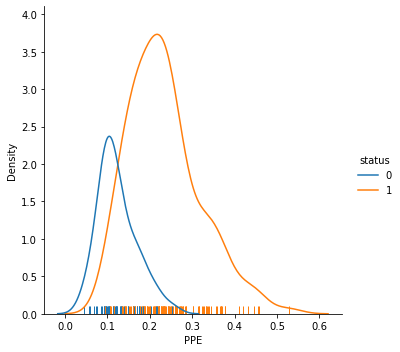

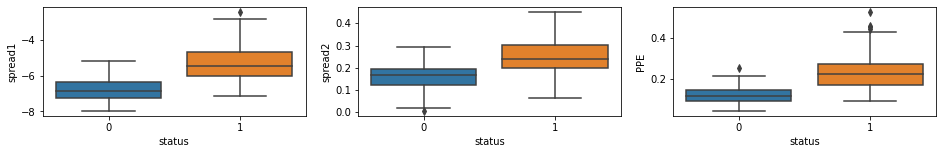

In [75]:
fig, ax = plt.subplots(1,3,figsize=(16,3))
sns.distplot(p_data['spread1'],ax=ax[0])
sns.distplot(p_data['spread2'],ax=ax[1])
sns.distplot(p_data['PPE'],ax=ax[2])

sns.displot(data=p_data, x=p_data["spread1"], ax=ax[0], hue="status", kind="kde",rug=True)
print("spread1 stats ",calculate_97_percent_range(p_data["spread1"].std(),p_data["spread1"].mean(),p_data["spread1"].max(),p_data["spread1"].min()))

sns.displot(data=p_data, x=p_data["spread2"], ax=ax[1], hue="status", kind="kde",rug=True)
print("spread2 stats",calculate_97_percent_range(p_data["spread2"].std(),p_data["spread2"].mean(),p_data["spread2"].max(),p_data["spread2"].min()))

sns.displot(data=p_data, x=p_data["PPE"], ax=ax[2], hue="status", kind="kde",rug=True)
print("PPE stats",calculate_97_percent_range(p_data["PPE"].std(),p_data["PPE"].mean(),p_data["PPE"].max(),p_data["PPE"].min()))

fig, ax = plt.subplots(1,3,figsize=(16,2))
sns.boxplot(x='status',y=p_data["spread1"],data=p_data, ax=ax[0])
sns.boxplot(x='status',y=p_data["spread2"],data=p_data, ax=ax[1])
sns.boxplot(x='status',y=p_data["PPE"],data=p_data, ax=ax[2])


Skewness values :- <br>
spread1 skewness is 0.4321389320131796<br>
spread2 skewness is 0.14443048549278412<br>
PPE skewness is 0.7974910716463578<br>
Outlier values :- <br>
no. of outliers are 4 for the column  spread1<br>
no. of outliers are 2 for the column  spread2<br>
no. of outliers are 5 for the column  PPE<br>

We can see a good separation of values in the above features between PD and non PD.
It might turn out to be a good indicator.<br>
Skewness and outlier values indicating the spread is given above along with the sign.<br>
The distribution segmented by status is populated above along with the kde graph which gives
the density of values for each of the feature<br>

<b>Bivariate/Multivariate analysis</b>

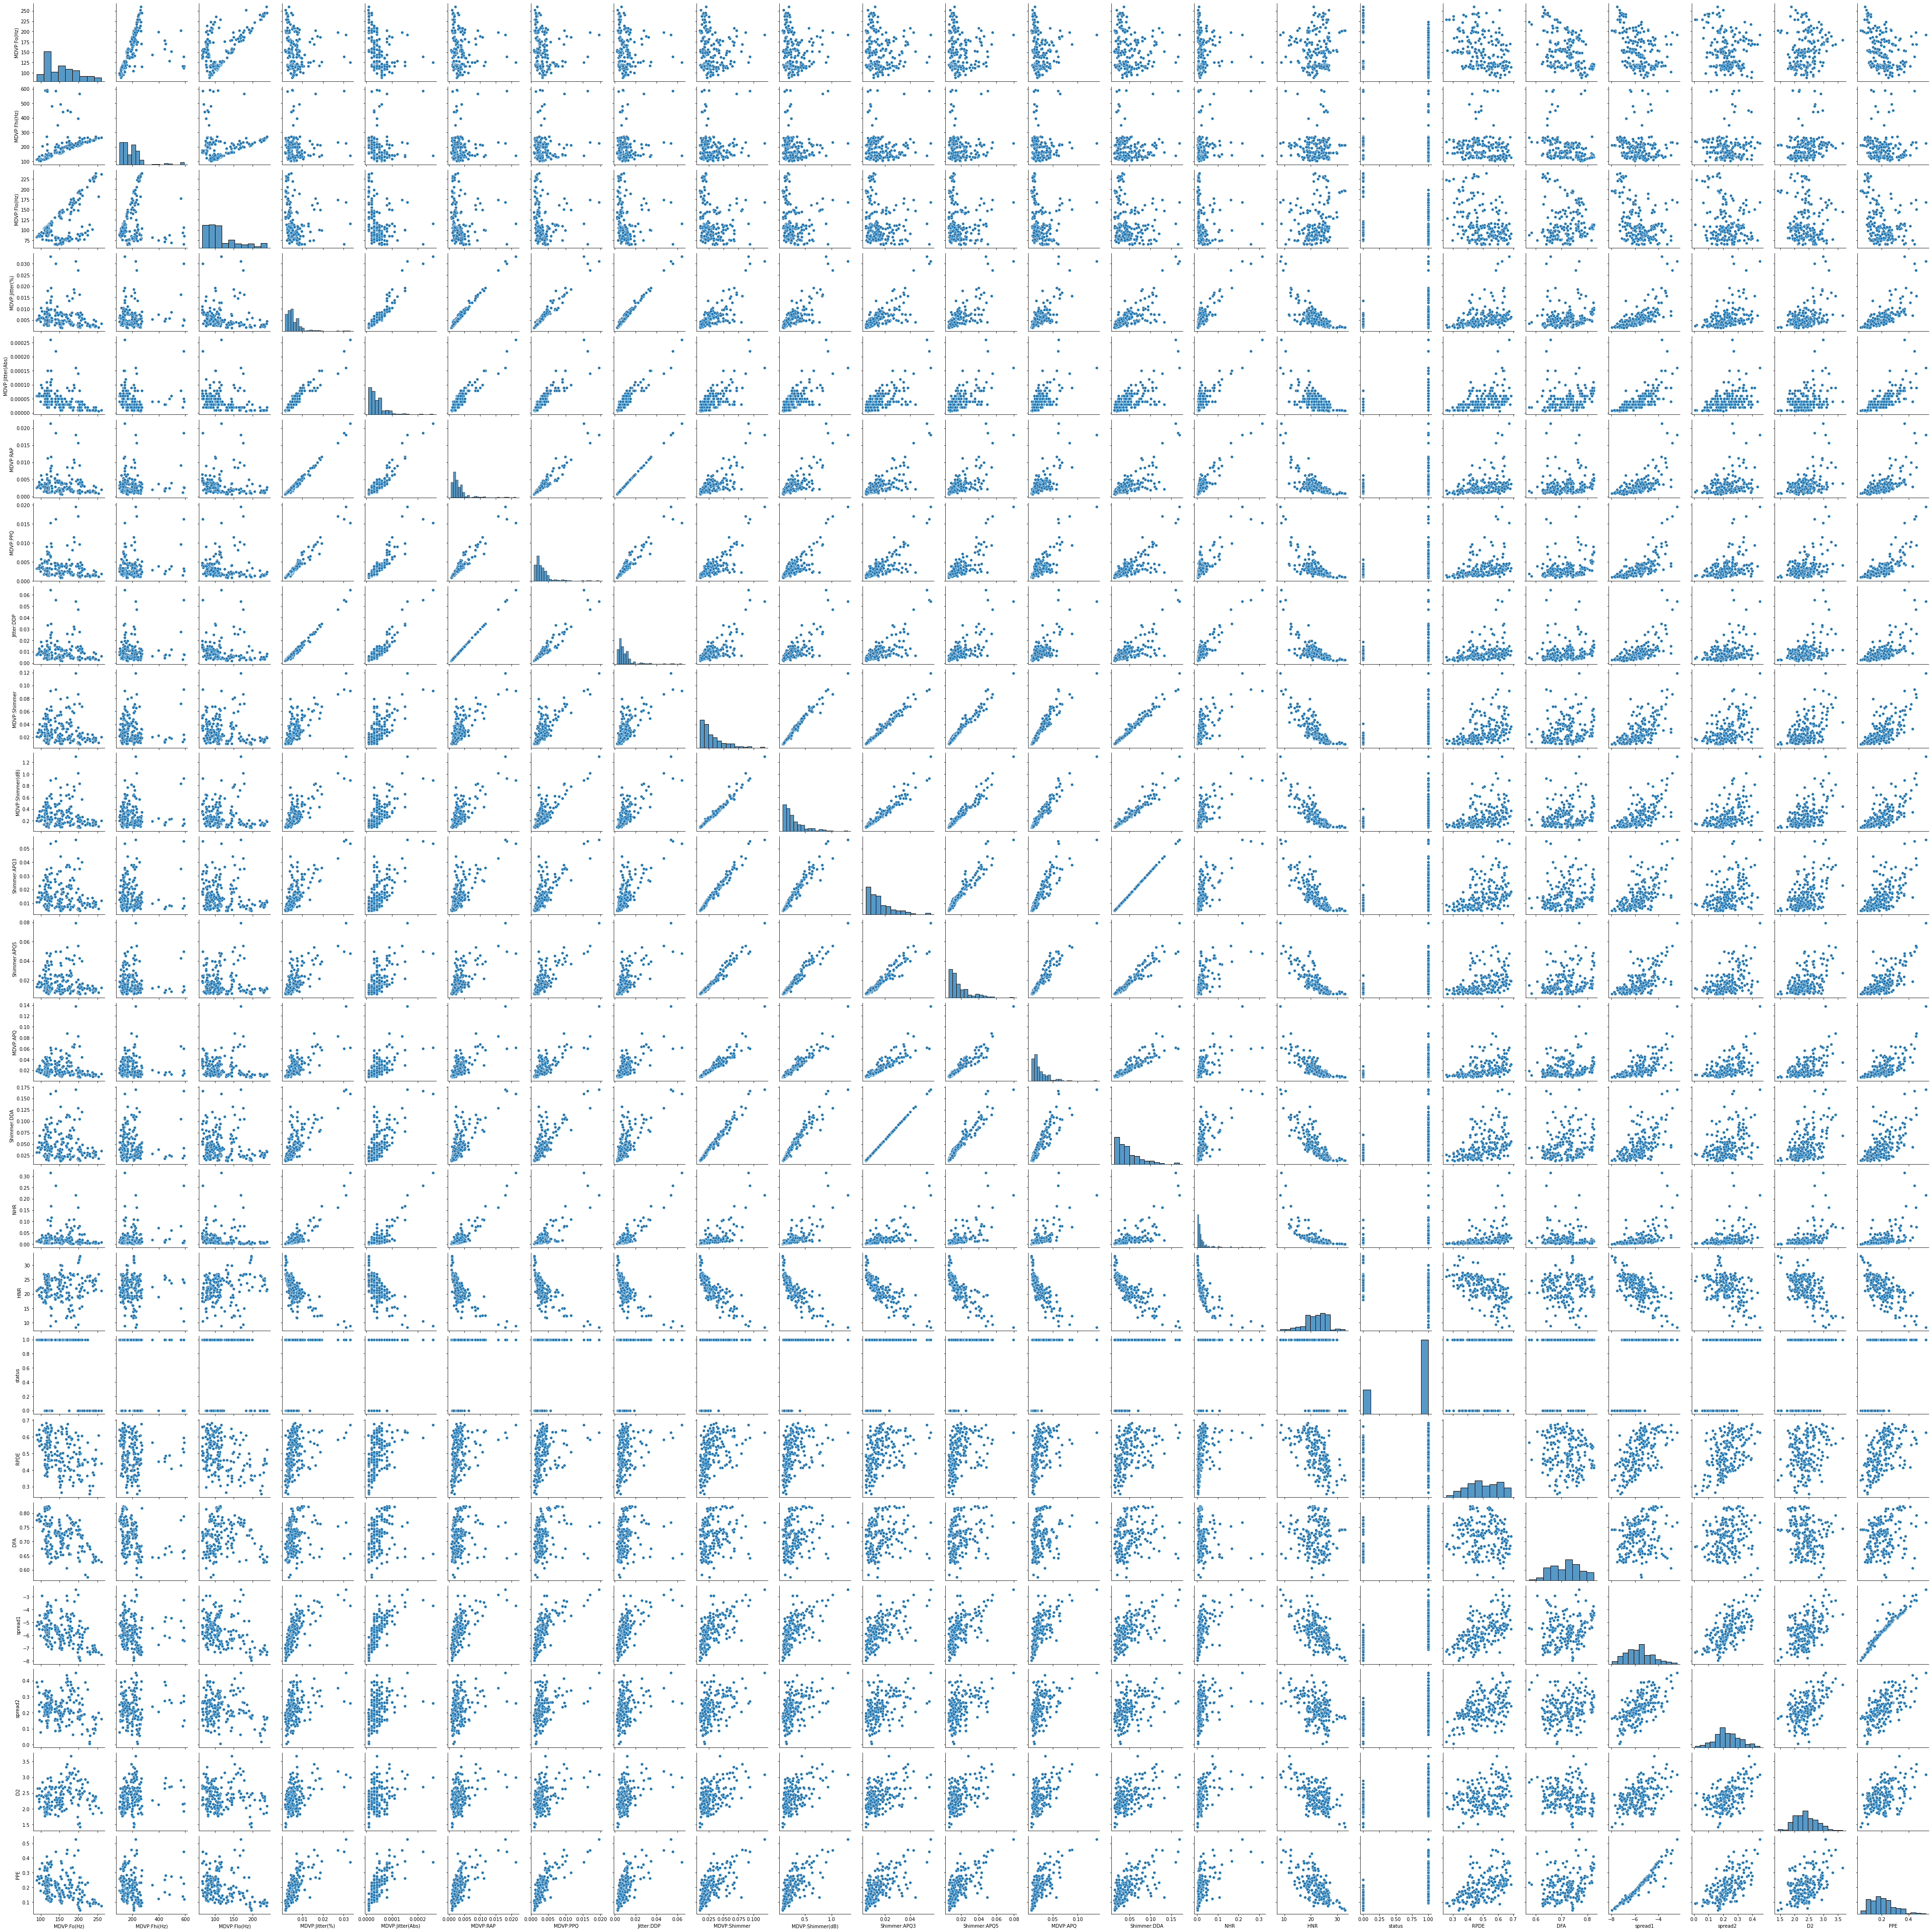

In [76]:
sns.pairplot(p_data)

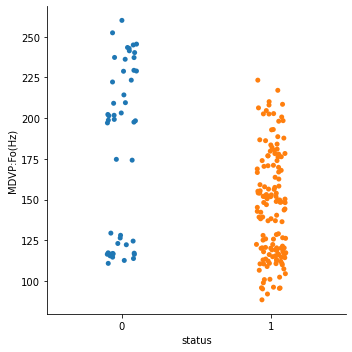

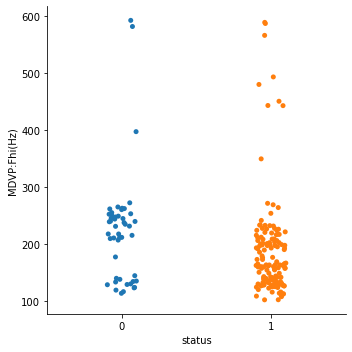

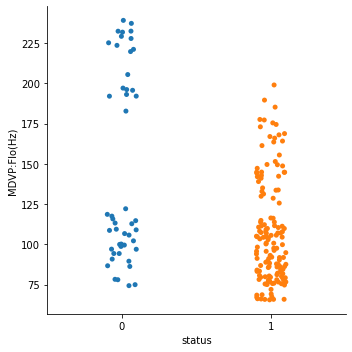

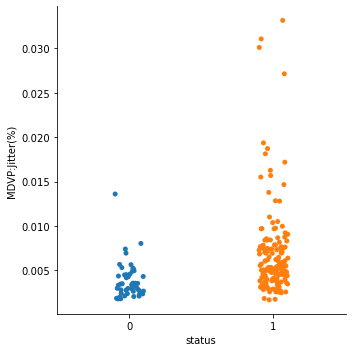

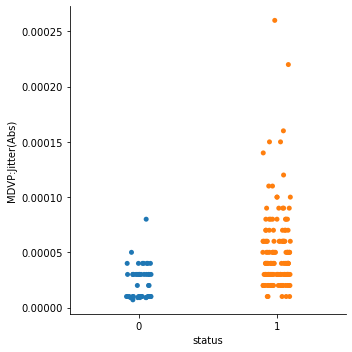

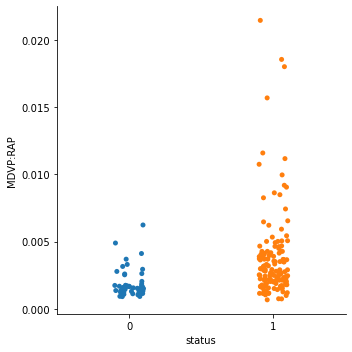

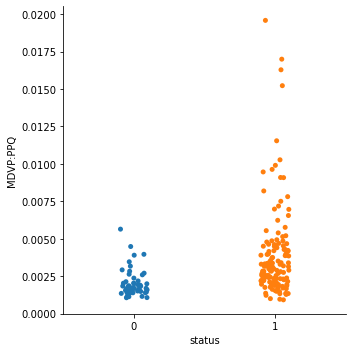

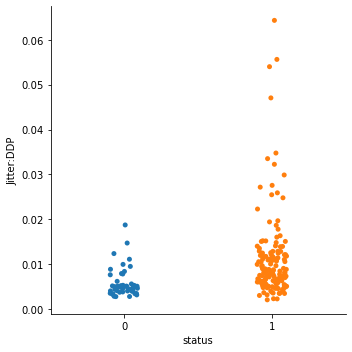

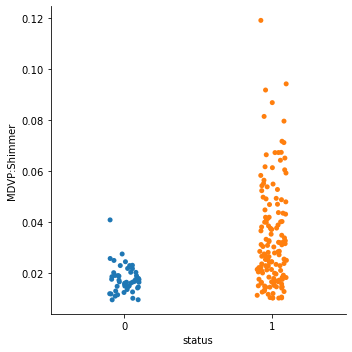

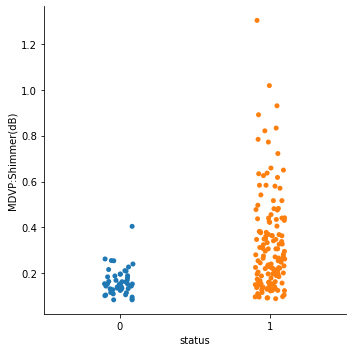

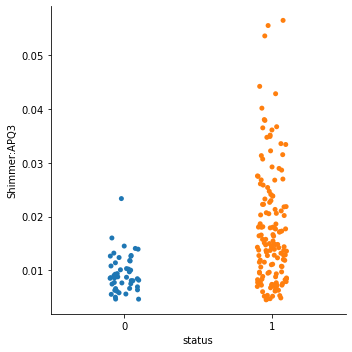

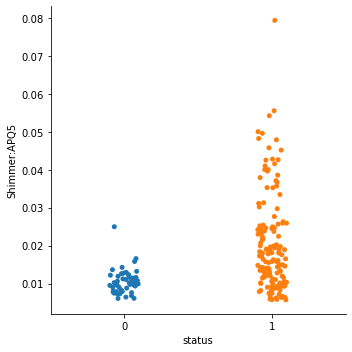

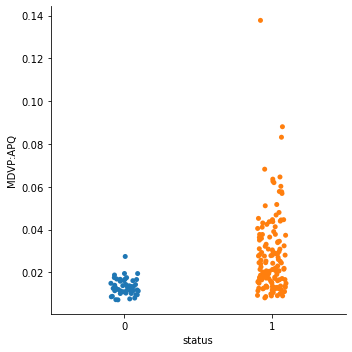

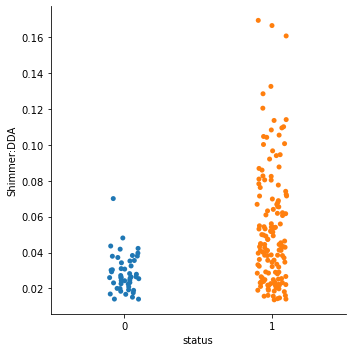

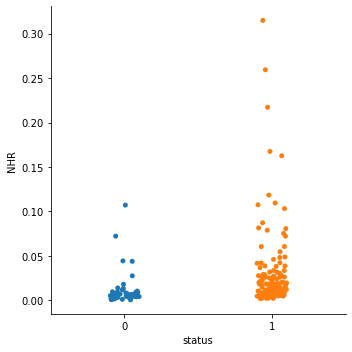

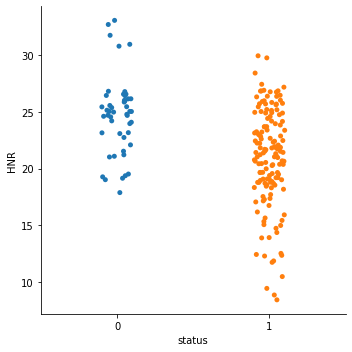

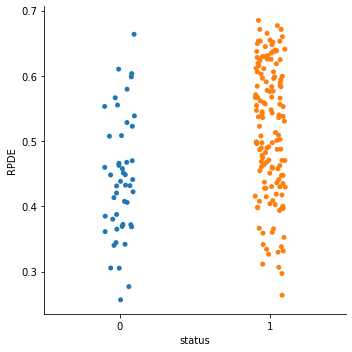

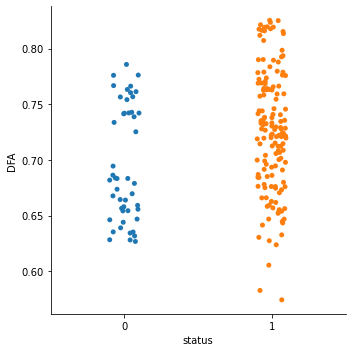

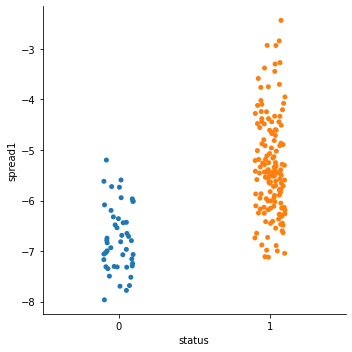

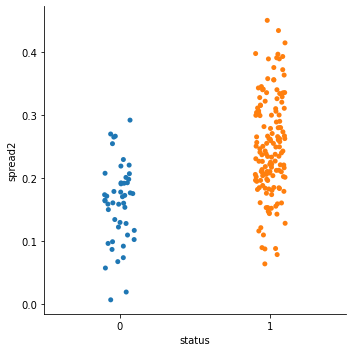

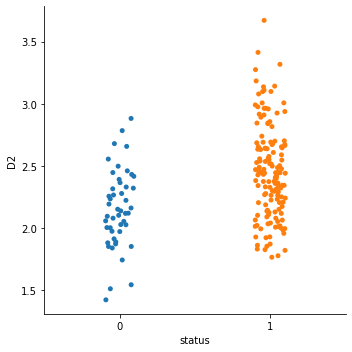

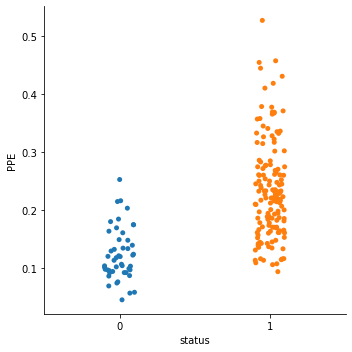

In [77]:
# fig, ax = plt.subplots(5,5,figsize=(16,16))
# axes=axes.flatten()
# i=0
for column in p_data.columns:
    if((column != 'name') and (column != 'status')):
        sns.catplot(y=column, x='status', data=p_data)
        plt.tight_layout()
        plt.show()


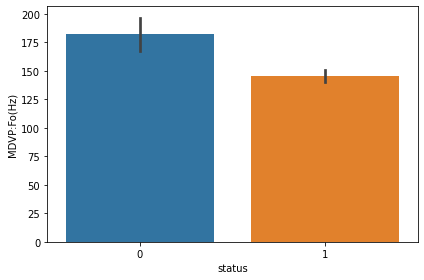

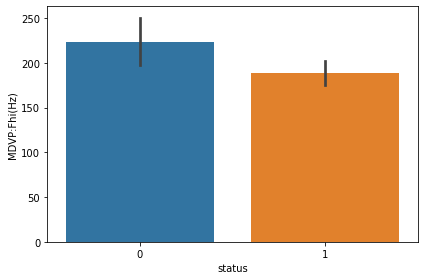

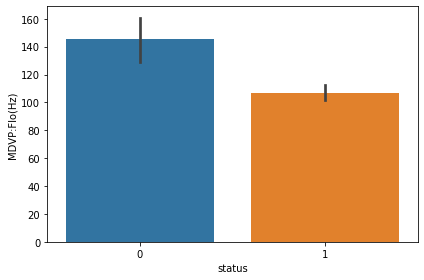

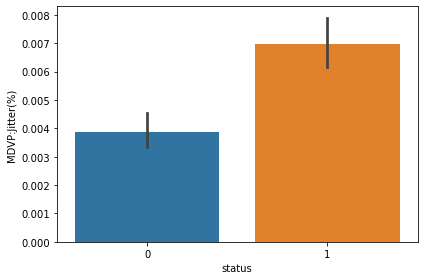

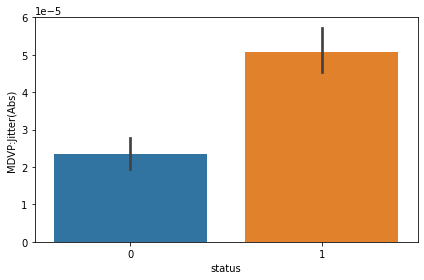

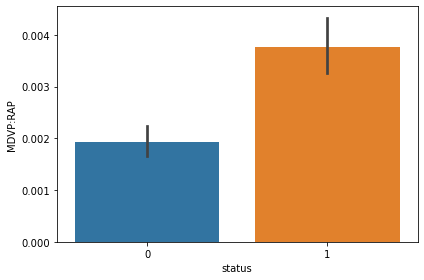

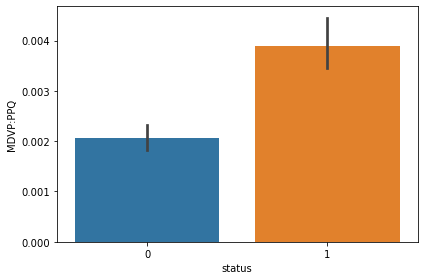

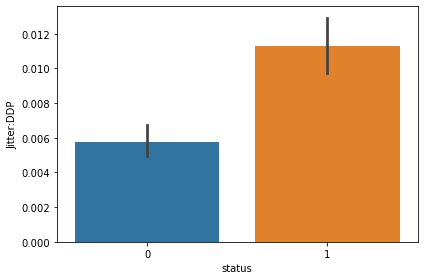

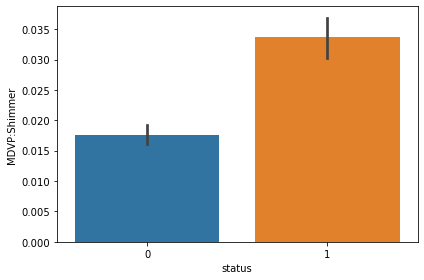

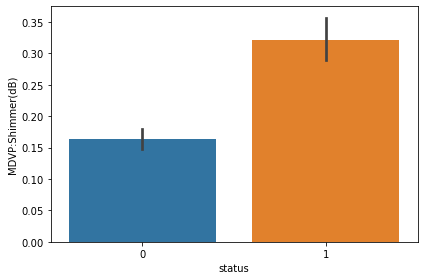

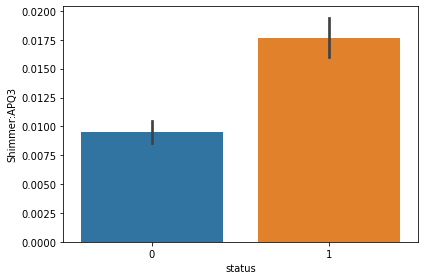

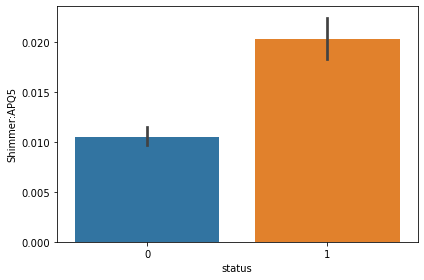

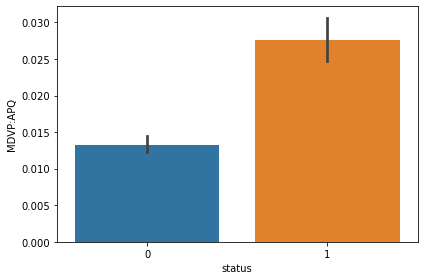

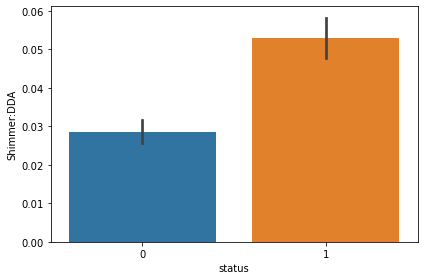

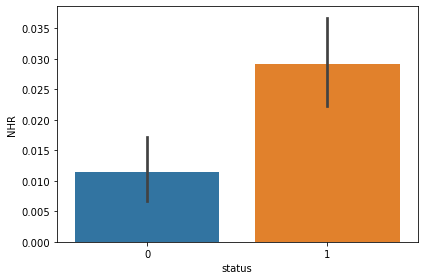

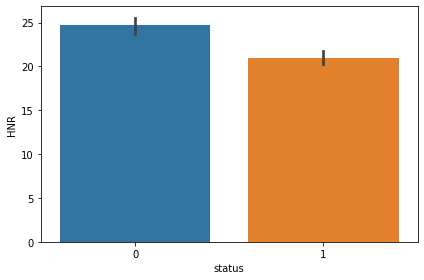

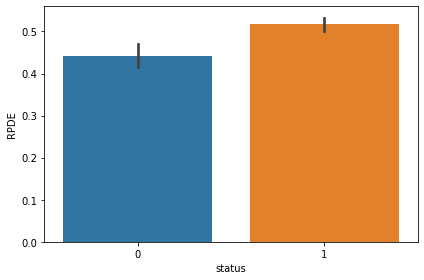

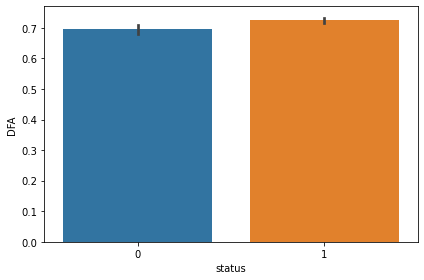

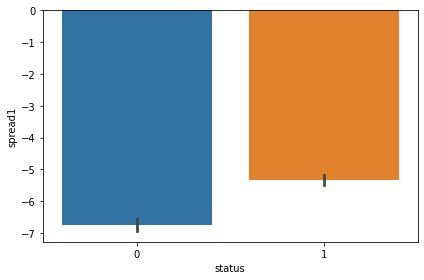

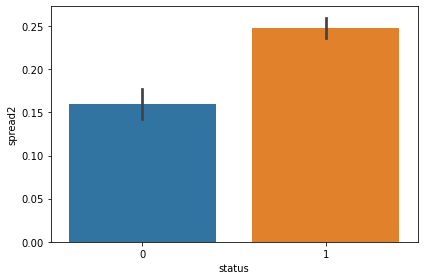

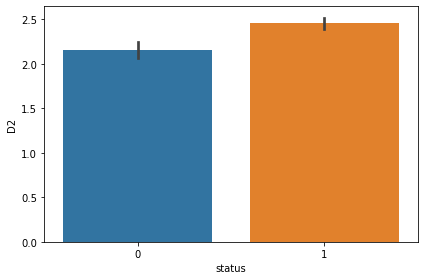

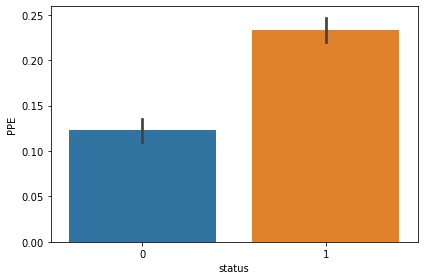

In [78]:
for column in p_data.columns:
    if((column != 'name') and (column != 'status')):
        sns.barplot(y=column, x='status', data=p_data)
        plt.tight_layout()
        plt.show()

We can see above in the bar and cat plot that the below features show quite a bit of <br >difference in values when comparing the PD and non PD values<br>
MDVP:Fo(Hz)<br>
Jitter:DDP<br>
MDVP:Shimmer<br>
MDVP:Shimmer(dB)<br>
MDVP:Jitter(Abs) <br>
Shimmer:APQ3<br>
Shimmer:APQ5<br>
MDVP:PPQ<br>
MDVP:APQ<br>
NHR<br>
PPE<br>
MDV:RAP<br>
spread2<br>
spread1<br>





<b>Correlation Analysis</b>

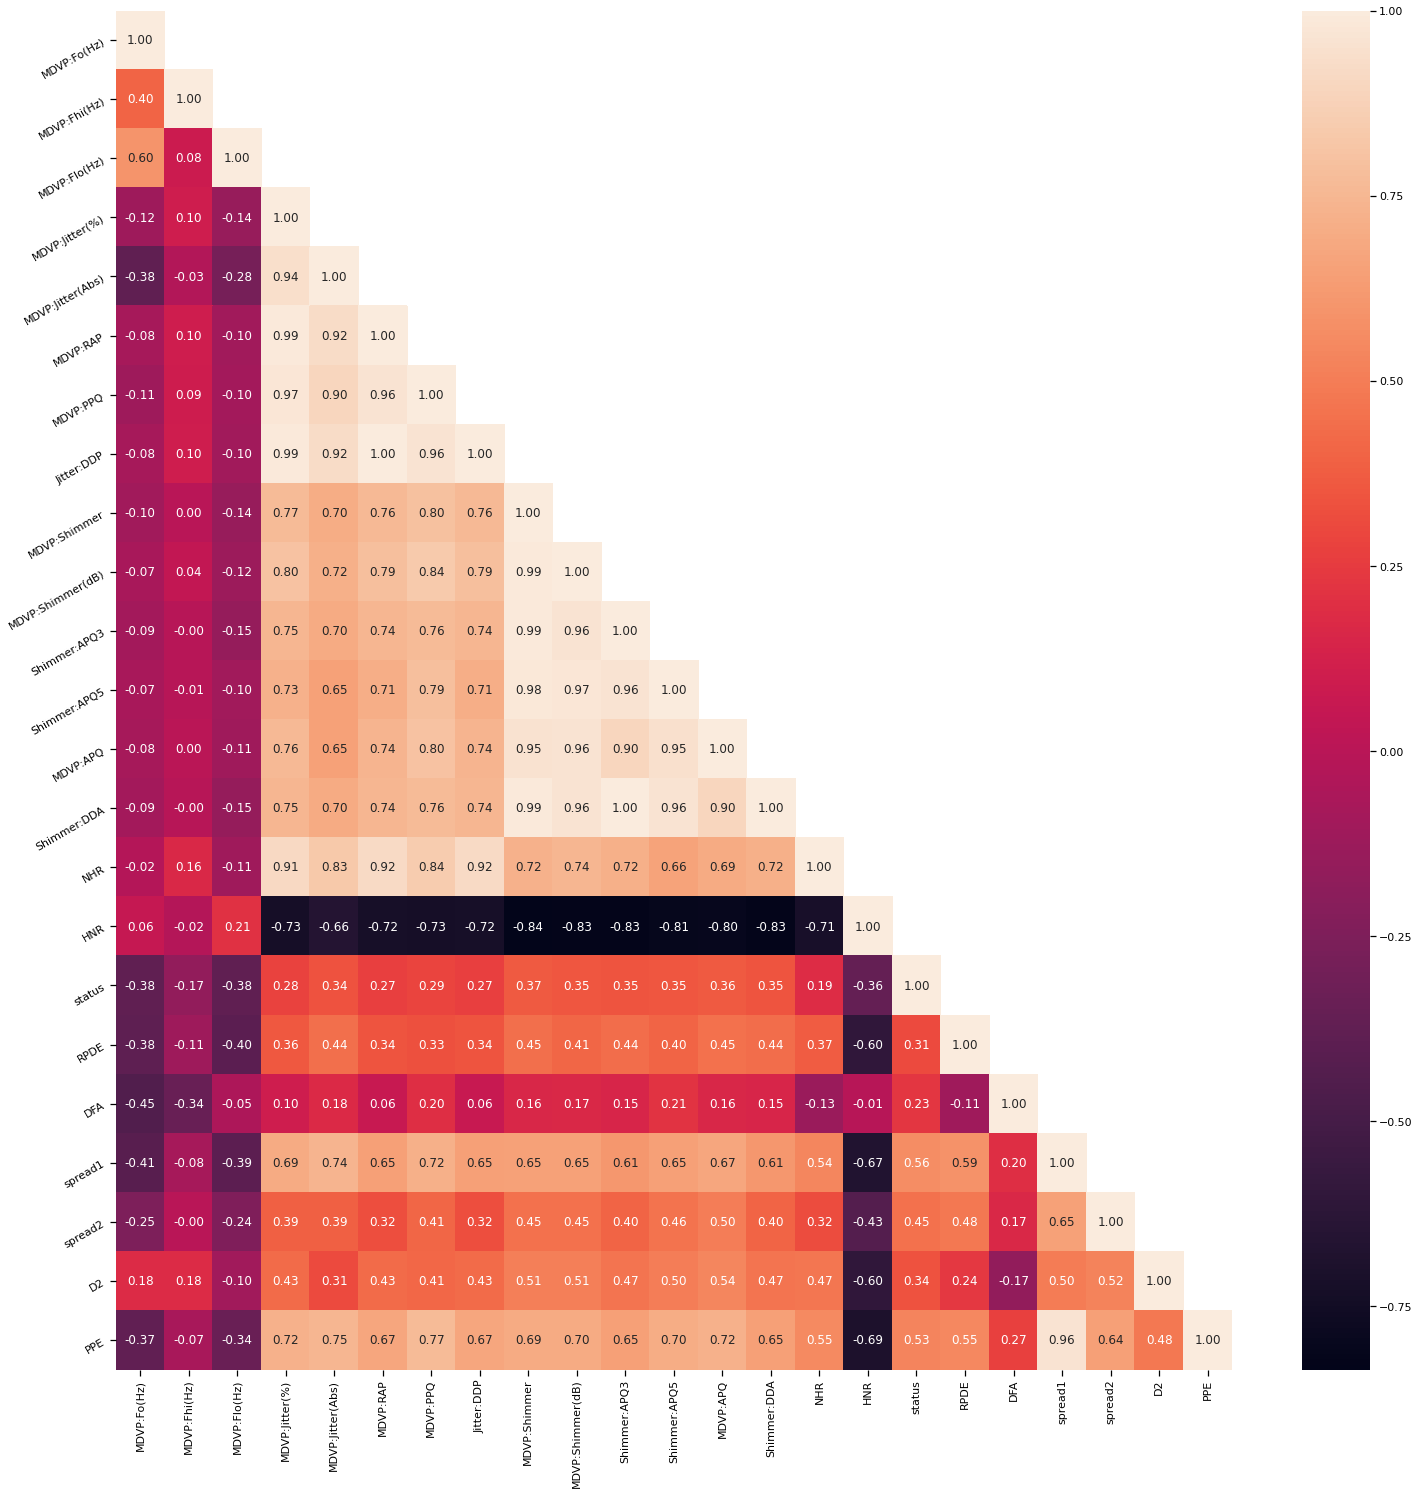

In [79]:

corr = p_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(25,25))
msk = np.zeros_like(corr)
msk[np.triu_indices_from(msk, 1)] = True
a = sns.heatmap(corr,mask=msk, annot=True, fmt='.2f')
x = a.set_xticklabels(a.get_xticklabels(), rotation=90)
y = a.set_yticklabels(a.get_yticklabels(), rotation=30)

We can see a lot of correlation between the features.<br>
Some of them are highly correlated(more than .95). Let us find out the features which are <br>
well correlated with the target variable.

<b>Correlation between target variable and columns</b>

In [80]:
p_data[p_data.columns[1:]].corr()['status'][:]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

We can see that spread1 , spread2, PPE, D2, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, MDVP:Jitter(%) and MDVP:Jitter(Abs) are decently correlated with target variable.

<b>Find variables which are more than or equal to .95 correlated with each other</b>

In [81]:
cor_matrix = p_data.corr().abs()
print(cor_matrix)

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546        0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000        0.139919   
MDVP:Jitter(%)       0.118003      0.102086      0.139919        1.000000   
MDVP:Jitter(Abs)     0.382027      0.029198      0.277815        0.935714   
MDVP:RAP             0.076194      0.097177      0.100519        0.990276   
MDVP:PPQ             0.112165      0.091126      0.095828        0.974256   
Jitter:DDP           0.076213      0.097150      0.100488        0.990276   
MDVP:Shimmer         0.098374      0.002281      0.144543        0.769063   
MDVP:Shimmer(dB)     0.073742      0.043465      0.119089        0.804289   
Shimmer:APQ3         0.094717      0.003743      0.150747        0.746625   
Shimmer:APQ5         0.070682      0.009997      0.101095        0.725561   

In [82]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)               NaN      0.400985      0.596546        0.118003   
MDVP:Fhi(Hz)              NaN           NaN      0.084951        0.102086   
MDVP:Flo(Hz)              NaN           NaN           NaN        0.139919   
MDVP:Jitter(%)            NaN           NaN           NaN             NaN   
MDVP:Jitter(Abs)          NaN           NaN           NaN             NaN   
MDVP:RAP                  NaN           NaN           NaN             NaN   
MDVP:PPQ                  NaN           NaN           NaN             NaN   
Jitter:DDP                NaN           NaN           NaN             NaN   
MDVP:Shimmer              NaN           NaN           NaN             NaN   
MDVP:Shimmer(dB)          NaN           NaN           NaN             NaN   
Shimmer:APQ3              NaN           NaN           NaN             NaN   
Shimmer:APQ5              NaN           NaN           NaN             NaN   

In [83]:
high_corr_columns = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.95)]
print(high_corr_columns)

['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']


The high_corr_columns shows the list of unique columns having greater than equal to .95 correlation and can be dropped.

<h1>4. Split the dataset into training and test set in the ratio of 70:30</h1>

In [84]:
# We are copying the data so as to maintain an original copy to use when required.
data_copy = p_data.copy()

In [85]:
# dropping the name variable as it doesn't add to any value
data_copy.drop('name',axis=1,inplace=True)


In [86]:
data_copy.head(5)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085       1   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651       1   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644       1   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649       1   

       RPDE       DFA   spread1   spread2        D2       PPE  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [87]:
data_copy.shape

(195, 23)

In [88]:
p_data.shape

(195, 24)

In [89]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [90]:
X=data_copy.drop(['status'],axis=1)
Y=data_copy['status']

In [91]:
print(X.shape)
print(Y.shape)

(195, 22)
(195,)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

<h1>5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc</h1>

Missing value and nan value checks have been applied in earlier section.<br>
The data looks homogenous across the columns, but for more sophisticated erroneous value <br>checks domain expertise is required<br>
Below we are scaling the data and feeding it to the algorithms

In [93]:
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


<h1>6 . Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data</h1>

<b>Logistic Regression</b>

classification report               precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.83      1.00      0.91        40

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59

accuracy score  0.864406779661017


<AxesSubplot:>

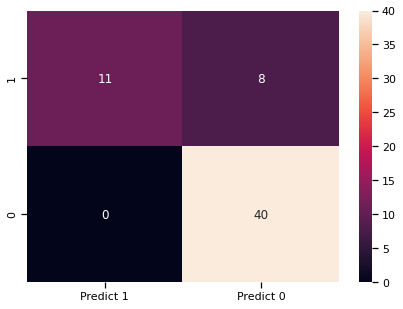

In [94]:
logreg_model = LogisticRegression(solver = 'liblinear')
logreg_model.fit(scaled_X_train,y_train)
logreg_y_pred = logreg_model.predict(scaled_X_test)
print("classification report", classification_report(y_test,logreg_y_pred))
print("accuracy score ", accuracy_score(y_test,logreg_y_pred))
cm = confusion_matrix(y_test, logreg_y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')


In [95]:
print('Accuracy on train set: {:.2f}'.format(logreg_model.score(scaled_X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logreg_model.score(scaled_X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,logreg_y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,logreg_y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,logreg_y_pred)))

Accuracy on train set: 0.90
Accuracy on test set: 0.86
Recall score: 1.00
ROC AUC score: 0.79
Precision score: 0.83


<b>KNN With Scaling</b>

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
X=data_copy.drop(['status'],axis=1)
Y=data_copy['status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [98]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9152542372881356, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8135593220338984, 0.8305084745762712, 0.7966101694915254, 0.8135593220338984, 0.7627118644067796, 0.7966101694915254, 0.7457627118644068, 0.7966101694915254, 0.7457627118644068, 0.7288135593220338, 0.7288135593220338, 0.7288135593220338, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7627118644067796, 0.7627118644067796]


Text(0, 0.5, 'Testing Accuracy')

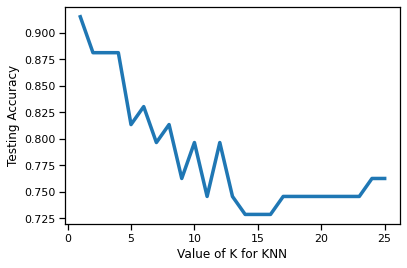

In [99]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Mean Error')

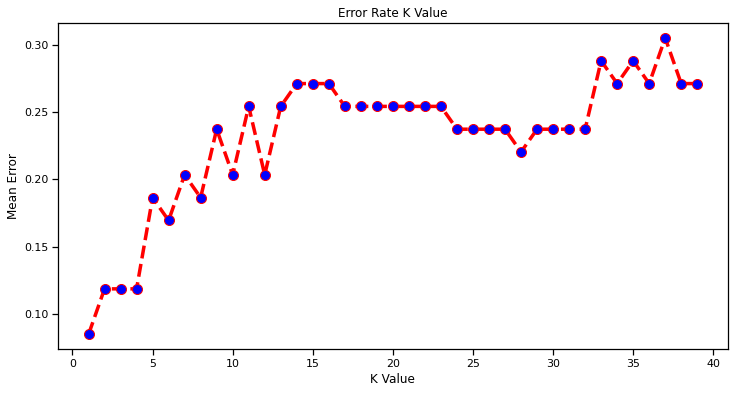

In [100]:

error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [101]:
from sklearn.neighbors import KNeighborsClassifier
scaled_knn_model = KNeighborsClassifier(n_neighbors=1 )
scaled_knn_model.fit(scaled_X_train, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(scaled_X_test)
scaled_knn_score = scaled_knn_model.score(scaled_X_test, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
print("knn_score is ",scaled_knn_score)
print("knn accuracy is", scaled_knn_accuracy)

knn_score is  0.9152542372881356
knn accuracy is 0.9152542372881356


<AxesSubplot:>

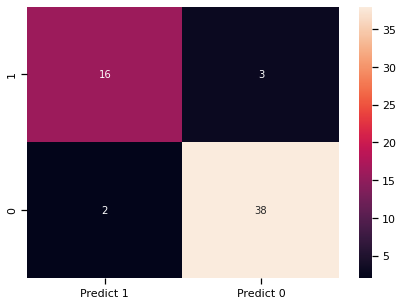

In [102]:
cm = confusion_matrix(y_test, scaled_knn_y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [103]:
print('Accuracy on train set: {:.2f}'.format(scaled_knn_model.score(scaled_X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(scaled_knn_model.score(scaled_X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,scaled_knn_y_predict)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,scaled_knn_y_predict)))
print('Precision score: {:.2f}'.format(precision_score(y_test,scaled_knn_y_predict)))

Accuracy on train set: 1.00
Accuracy on test set: 0.92
Recall score: 0.95
ROC AUC score: 0.90
Precision score: 0.93


<b>Naive Bayes Classification</b>

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
naive_model = GaussianNB()
naive_model.fit(scaled_X_train, y_train)
y_predict= naive_model.predict(scaled_X_test)

In [106]:
print(metrics.accuracy_score(y_test, y_predict))

0.6610169491525424


<AxesSubplot:>

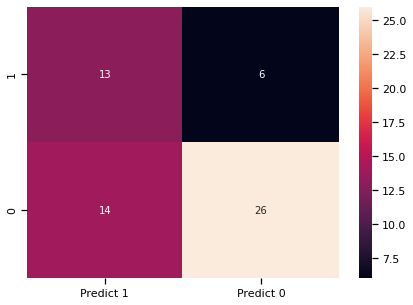

In [107]:
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.74      1.00      0.85        40

    accuracy                           0.76        59
   macro avg       0.87      0.63      0.63        59
weighted avg       0.82      0.76      0.71        59



<b>Applying the algorithms after dropping the correlated columns</b> from section 3<br>
['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']

In [109]:
X=data_copy.drop(['status','MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE'],axis=1)
Y=data_copy['status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
print(X.shape)
print(Y.shape)

(195, 13)
(195,)


<b>Logistic Regression</b>

classification report               precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59

accuracy score  0.847457627118644


<AxesSubplot:>

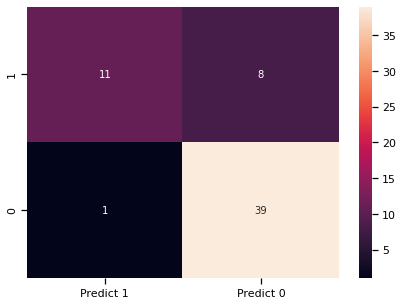

In [110]:
logreg_model1 = LogisticRegression(solver = 'liblinear')
logreg_model1.fit(scaled_X_train,y_train)
logreg_y_pred = logreg_model1.predict(scaled_X_test)
print("classification report", classification_report(y_test,logreg_y_pred))
print("accuracy score ", accuracy_score(y_test,logreg_y_pred))
cm = confusion_matrix(y_test, logreg_y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')


In [111]:
print('Accuracy on train set: {:.2f}'.format(logreg_model1.score(scaled_X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logreg_model1.score(scaled_X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,logreg_y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,logreg_y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,logreg_y_pred)))

Accuracy on train set: 0.90
Accuracy on test set: 0.85
Recall score: 0.97
ROC AUC score: 0.78
Precision score: 0.83


<b>KNN</b>

In [112]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(scaled_X_train, y_train)
    y_pred = knn1.predict(scaled_X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9322033898305084, 0.9322033898305084, 0.864406779661017, 0.8983050847457628, 0.8305084745762712, 0.8305084745762712, 0.7966101694915254, 0.8135593220338984, 0.7627118644067796, 0.8135593220338984, 0.7457627118644068, 0.7627118644067796, 0.7457627118644068, 0.7627118644067796, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068]


Text(0, 0.5, 'Testing Accuracy')

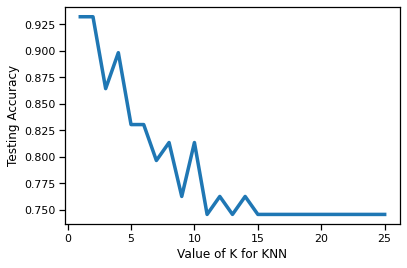

In [113]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Mean Error')

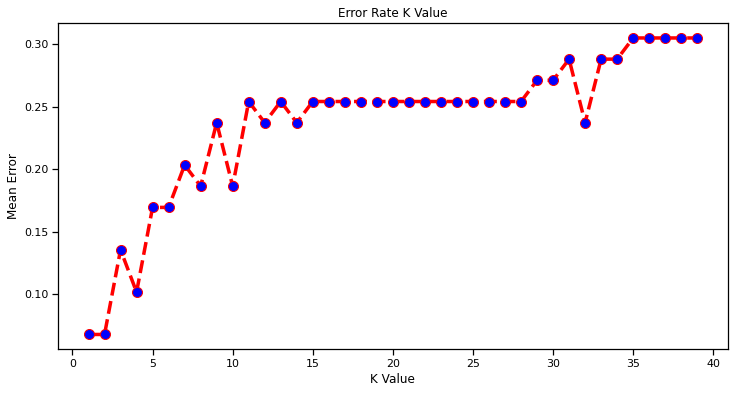

In [114]:

error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [115]:
from sklearn.neighbors import KNeighborsClassifier
scaled_knn_model1 = KNeighborsClassifier(n_neighbors=2 )
scaled_knn_model1.fit(scaled_X_train, y_train)
scaled_knn_y_predict = scaled_knn_model1.predict(scaled_X_test)
scaled_knn_score = scaled_knn_model1.score(scaled_X_test, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
print("knn_score is ",scaled_knn_score)
print("knn accuracy is", scaled_knn_accuracy)

knn_score is  0.9322033898305084
knn accuracy is 0.9322033898305084


After deleting the correlated columns there is an increase in accuracy that can be seen for knn.

<AxesSubplot:>

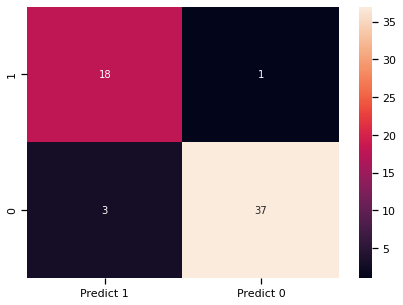

In [116]:
cm = confusion_matrix(y_test, scaled_knn_y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [117]:
print('Accuracy on train set: {:.2f}'.format(scaled_knn_model1.score(scaled_X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(scaled_knn_model1.score(scaled_X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,scaled_knn_y_predict)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,scaled_knn_y_predict)))
print('Precision score: {:.2f}'.format(precision_score(y_test,scaled_knn_y_predict)))

Accuracy on train set: 0.96
Accuracy on test set: 0.93
Recall score: 0.93
ROC AUC score: 0.94
Precision score: 0.97


<b>Naive Bayes</b>

In [118]:
naive_model1 = GaussianNB()
naive_model1.fit(scaled_X_train, y_train)
y_predict= naive_model1.predict(scaled_X_test)

In [119]:
print(metrics.accuracy_score(y_test, y_predict))
print('Recall score: {:.2f}'.format(recall_score(y_test,y_predict)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_predict)))
print('Precision score: {:.2f}'.format(precision_score(y_test,y_predict)))


0.7288135593220338
Recall score: 0.78
ROC AUC score: 0.70
Precision score: 0.82


<AxesSubplot:>

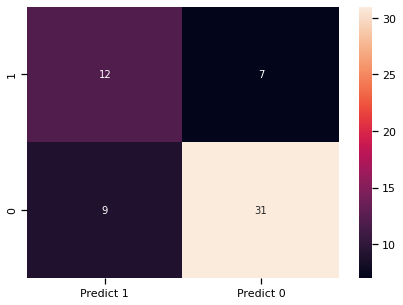

In [120]:
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

There is an increase in efficiency in Naive Bayes after the correlated columns were dropped.

The KNN model with dropped correlated columns give the best accuracy.<br>
Below are the scores printed for KNN<br>
Accuracy on train set: 0.96<br>
Accuracy on test set: 0.93<br>
Recall score: 0.93<br>
ROC AUC score: 0.94<br>
Precision score: 0.97<br>

<h1>7. Train a meta-classifier and note the accuracy on test data</h1>

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(scaled_X_train, y_train)*100
    acc_test = clf.score(scaled_X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    score = {
        "training_accuracy":acc_train,
        "testing_accuracy":acc_test,
        "roc":roc,
        "correct_predictions":correct,
        "incorrect_predictions":incorrect,
        "confusion_matrix":cm
    }
    return score

In [122]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.svm import SVC

svc = SVC()
sclf = StackingClassifier(classifiers=[logreg_model1, scaled_knn_model1, naive_model1], 
                          meta_classifier=svc)
sclf.fit(scaled_X_train, y_train)
for clf, label in zip([logreg_model1, scaled_knn_model1, naive_model1, sclf], 
                      ['Logistic Regression', 
                       'KNN', 
                       'Naive Bayes',
                       'StackingClassifier']):

    Y_pred = clf.predict(scaled_X_test)
    scores = clf_scores(clf, Y_pred)    
    print(scores, label)

{'training_accuracy': 89.70588235294117, 'testing_accuracy': 84.7457627118644, 'roc': 77.69736842105263, 'correct_predictions': 50, 'incorrect_predictions': 9, 'confusion_matrix': array([[11,  8],
       [ 1, 39]])} Logistic Regression
{'training_accuracy': 95.58823529411765, 'testing_accuracy': 93.22033898305084, 'roc': 93.61842105263159, 'correct_predictions': 55, 'incorrect_predictions': 4, 'confusion_matrix': array([[18,  1],
       [ 3, 37]])} KNN
{'training_accuracy': 77.20588235294117, 'testing_accuracy': 72.88135593220339, 'roc': 70.32894736842104, 'correct_predictions': 43, 'incorrect_predictions': 16, 'confusion_matrix': array([[12,  7],
       [ 9, 31]])} Naive Bayes
{'training_accuracy': 96.32352941176471, 'testing_accuracy': 88.13559322033898, 'roc': 82.96052631578948, 'correct_predictions': 52, 'incorrect_predictions': 7, 'confusion_matrix': array([[13,  6],
       [ 1, 39]])} StackingClassifier


The metaclassifier builds up an accuracy of. 96.32 which is almost equivalent to the knn model with dropped correlated columns that we found above.

<h1>Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy</h1>

<b>Random Forest Classifier</b>

In [123]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]
for column in data_copy.columns:
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(scaled_X_train, y_train)
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(scaled_X_train), y_train, 'Train'),
        (tree.predict(scaled_X_test), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    x_val=cross_val_score(estimator=RandomForestClassifier(),X=scaled_X_train,y=y_train,cv=4)
    print(x_val.mean())
    print(x_val.std())
    print("*"*50)
    

Best parameters set:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.99      1.00      1.00       107

    accuracy                           0.99       136
   macro avg       1.00      0.98      0.99       136
weighted avg       0.99      0.99      0.99       136

**************************************************
Train Confusion Matrix:
[[ 28   1]
 [  0 107]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.80      0.97      0.88        40

    accuracy                           0.81     

0.8676470588235293
0.02547133540542467
**************************************************
Best parameters set:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.99      1.00      1.00       107

    accuracy                           0.99       136
   macro avg       1.00      0.98      0.99       136
weighted avg       0.99      0.99      0.99       136

**************************************************
Train Confusion Matrix:
[[ 28   1]
 [  0 107]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1 

0.8823529411764706
0.03602190798210557
**************************************************
Best parameters set:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.99      1.00      1.00       107

    accuracy                           0.99       136
   macro avg       1.00      0.98      0.99       136
weighted avg       0.99      0.99      0.99       136

**************************************************
Train Confusion Matrix:
[[ 28   1]
 [  0 107]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1 

0.9044117647058824
0.04350058664043836
**************************************************
Best parameters set:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.99      1.00      1.00       107

    accuracy                           0.99       136
   macro avg       1.00      0.98      0.99       136
weighted avg       0.99      0.99      0.99       136

**************************************************
Train Confusion Matrix:
[[ 28   1]
 [  0 107]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1 

Trying to find the best split values for random forest but reaching system limits.
A comparison of the different attributes will give us the best hyperparameters.

In [ ]:
random_forest = RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
random_forest = random_forest.fit(scaled_X_train, y_train)
y_pred = random_forest.predict(scaled_X_test)
random_forest.score(scaled_X_test , y_test)


In [ ]:
print('Accuracy on train set: {:.2f}'.format(random_forest.score(scaled_X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(random_forest.score(scaled_X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,logreg_y_pred)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,logreg_y_pred)))
print('Precision score: {:.2f}'.format(precision_score(y_test,logreg_y_pred)))

In [ ]:
feature_imp = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

<h1> 9. Compare all the models (minimum 5) and pick the best one among them </h1>

Following are the best scores for each of the models <br>
<b>1. Logistic regression (with scaling)</b><br>
Accuracy on train set: 0.90<br>
Accuracy on test set: 0.85<br>
Recall score: 0.97<br>
ROC AUC score: 0.78<br>
Precision score: 0.83<br>

<b>2. KNN</b><br>
Accuracy on train set: 0.96<br>
Accuracy on test set: 0.93<br>
Recall score: 0.93<br>
ROC AUC score: 0.94<br>
Precision score: 0.97<br>

<b>2. Naive Bayes</b><br>
Accuracy on test set 0.7288135593220338<br>
Recall score: 0.78<br>
ROC AUC score: 0.70<br>
Precision score: 0.82<br>

<b>Meta Classifier - Stacking classifier</b><br>
'training_accuracy': 89.70588235294117,<br>
'testing_accuracy': 84.7457627118644,<br>
'roc': 77.69736842105263, <br>
'correct_predictions': 50, <br>
'incorrect_predictions': 9<br>

<b>Random Forest Clasifier</b><br>
Accuracy on train set: 1.00<br>
Accuracy on test set: 0.83<br>
Recall score: 0.97<br>
ROC AUC score: 0.78<br>
Precision score: 0.83<br>

The best performance is given by the KNN classifier.The least accurate is the Naive Bayes Classifier.

In terms of recall the Random Forest Classifier has performed extremely well.
The accuracy for random forest is pretty good as well along with a good ROC/AUC score.

<h1>Conclusion<h1>

Based on different studies on Parkinson's data and the way the features<br>
are extracted different models perform well for example in one study<br>
https://iopscience.iop.org/article/10.1088/1742-6596/1372/1/012041/pdf <br>
the Random Forest performed well<br>
whereas in another the KNN with performed well<br>
https://scialert.net/abstract/?doi=jas.2014.171.176<br>
In the study conducted by me I have chosen delete the correlated columns with <br>
correlation index more than .94 which has produced the above results<br>
